<center><font size="+4">Introduction to Programming and</font></center>
<center><font size="+4">Data Processing in Python 2022/2023</font></center>
<br/>
<center><font size="+2">Core course, PhD program in Computer Science</font></center>
<center><font size="+2">GSSI Gran Sasso Science Institute, L'Aquila, Italy</font></center><br/>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+1">
    &nbsp;&nbsp;
    <a href="https://www.santannapisa.it/en/andrea-vandin">Andrea Vandin</a> &nbsp; a.vandin@santannapisa.it</font></center>
<center><font size="+1"><a href="https://www.linkedin.com/in/daniele-licari">Daniele Licari [INFORMALLY]</a> &nbsp; d.licari@santannapisa.it</font></center>

<center><img src="https://github.com/EMbeDS-education/IPDPP-GSSI-20222023/raw/main/jupyter/jupyterNotebooks/images/SSSAsimple.png" width="700" alt="EMbeDS"></center>

---
---

<center><font size="+4">Part 2</font></center>
<center><font size="+4">Lecture 4: Breast Cancer Diagnosis 1</font></center>
<center><font size="+4">Overview of Data Processing and EDA</font></center>

---

> __This notebook has been created by Dr Daniele Licari for previous editions of this course, and then further elaborated by Andrea Vandin__
> - __I thank Daniele for the great job in preparing the material__
> - __I also thank Daniele for collaborating on the design of this course since its editions/incarnations__

In [63]:
from IPython.display import Image, display
course_name='IPDPP-GSSI-20222023'
url_github_repo="https://github.com/EMbeDS-education/"+course_name+"/raw/main/"

**This notebook provides an overview of unsupervised learning pipeline**
   * Exploratory Data Analysis (data pre-processing, missing values, visualization ...)
   * Outliers Detection
   * Correlation

You can find more details in the [APPENDIX](#APPENDIX) of this document.

In particular, this notebook will use and introduce the libraries:

   * [scikit-learn](https://scikit-learn.org/stable/): simple and efficient tools for predictive data analysis 
   * [Seaborn](http://seaborn.pydata.org/): seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**References** 

Some in-depth study material:

* <mark> [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml)</mark>
* <mark> [Statistical Learning & Large Data, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20222023/wiki/SLLD)</mark>
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page)

Some pictures have been taken from these sources.

# What Is Machine Learning?

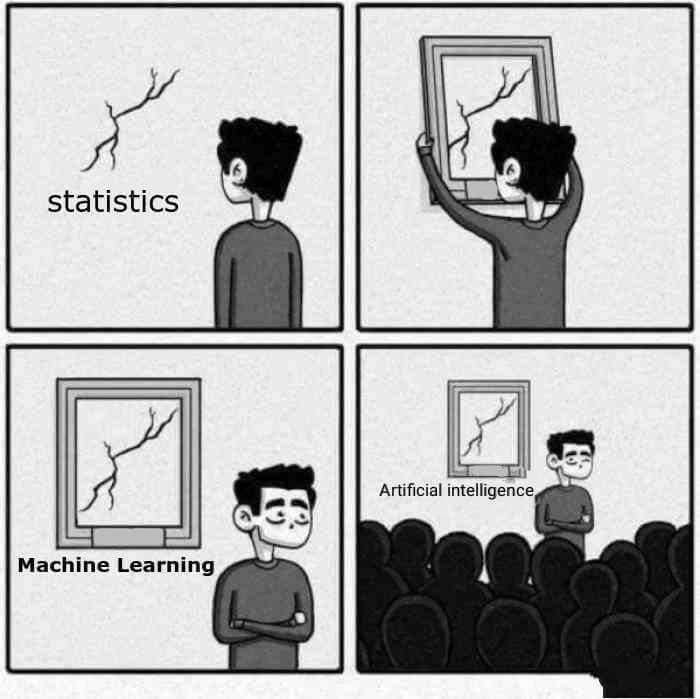

In [64]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/whats_ml.jpg',width=400)
display(img)

<!--<img src="images/whats_ml.jpg" alt="ML" style="width: 400px;"/>-->

Machine learning can be categorized into two main types: supervised learning and unsupervised learning.

- **Supervised learning** models try to learn the relationship between measured features X of data and some labels y associated with the data; it can be used to apply labels to new, unknown data. 
  - This is further subdivided into:
    - *Classification* tasks, the labels are discrete categories
    - *Regression* tasks, the labels are continuous quantities. 

- **Unsupervised learning** involves modeling the features of a dataset X without reference to any label, and is often described as “letting the dataset speak for itself.” 
    - These models include tasks such as:
      - *Outlier Detection* is the identification of rare items
      - *Dimensionality Reduction* search for a lower-dimensional representations of the data.
      - *Clustering* identify distinct groups of data

# Benign and Malignant Breast Cancer Case Study 
We will analize Wisconsin Breast Cancer Dataset (WBCD), 
- Features (one row of the CSV) are computed from a digitized image of a biopsy (fine needle aspirate, FNA) of a breast mass. 
- These features describe characteristics of the cell nuclei present in the image.

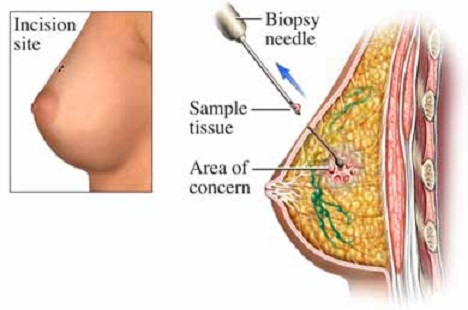

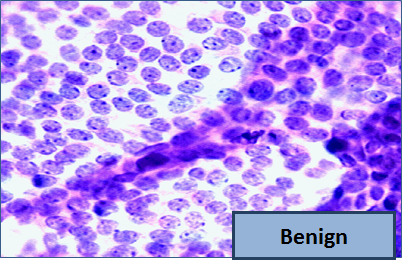

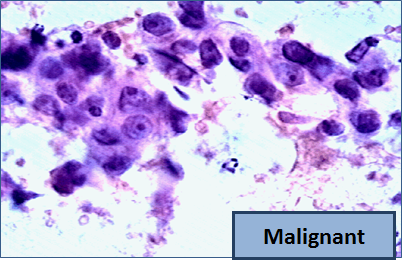

In [65]:
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/Breast-Biopsy-2.jpg')
display(img)

display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/fna-benign1.png'))

display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/fna-malignant1.png'))

**Type of information available for each _circle_ in an image**
1. radius (mean of distances from center to points on the perimeter)
1. texture (standard deviation of gray-scale values)
1. perimeter
1. area
1. smoothness (local variation in radius lengths)
1. compactness (perimeter^2 / area - 1.0)
1. concavity (severity of concave portions of the contour)
1. concave points (number of concave portions of the contour)
1. symmetry 
1. fractal dimension ("coastline approximation" - 1)

**Features available for each image**

For each such information, the mean, standard error, and "worst" or largest (mean of the three
largest values) were computed
- This resulted in __30 features__.  
- For instance, 
  - Features 1, 2, and 3 are the mean, standard error and worst mean of radius

**Labels Class:**
* malignant
* benign



This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

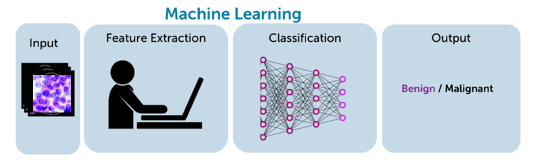

In [66]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/machine_learning_cancer.png'))

## Prerequisites
We will start by installing the necessary tools

In [67]:
#import sys
# numpy for numerical computing
# %pip install numpy
# # pandas for data processing
# %pip install pandas 
 # seaborn for visualization
%pip install seaborn
# #sklearn for machine learning 
%pip install scikit-learn
# scipy for statistical functions 
%pip install scipy  
# statsmodels for statistical models
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Load libraries

In [68]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import seaborn as sns # data visualization library based on matplotlib
from IPython.display import display, Markdown # display Markdown code using Python

from warnings import filterwarnings # add this only when you finished your analysis 
filterwarnings('ignore')

In [69]:
#Markdown("# Ciao")

The first time you run this notebook, you need to download a python library we prepared
- ipdpp_utils.py

In [70]:
import urllib.request
from pathlib import Path
url=url_github_repo+'jupyter/jupyterNotebooks/ipdpp_utils.py'
print('Downloading library created for this course from',url)
urllib.request.urlretrieve(url,Path(url).name)

('ipdpp_utils.py', <http.client.HTTPMessage at 0x7f8360b53820>)

## Load Dataset

In [71]:
csv_path='https://raw.githubusercontent.com/EMbeDS-education/'+course_name+'/main/datasets/WDBC.csv'
print('We load the csv from',csv_path)

We load the csv from https://raw.githubusercontent.com/EMbeDS-education/IPDPP-GSSI-20222023/main/datasets/WDBC.csv


In [72]:
# load dataset 
#data = pd.read_csv('data/WBCD.csv')
data = pd.read_csv(csv_path)
data.shape

(569, 31)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

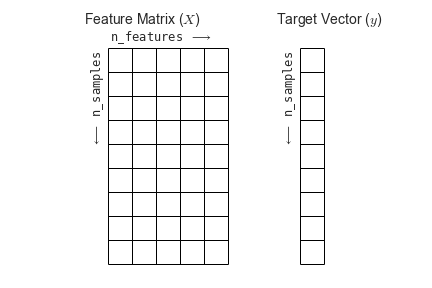

Data layout: df_X and df_y


In [74]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/05.02-samples-features.png'))
print('Data layout: df_X and df_y')


## Features matrix
* Here each row of the data refers to a single observed biopsy sample.
* By convention, this features matrix is often stored in a variable named `X`

In [75]:
data.iloc[:,-1]

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: target, Length: 569, dtype: object

In [76]:
# Features matrix 
df_X = data.iloc[:,:-1] 
# feature DataFrame
print(df_X.shape)

df_X.head()

(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

## Target array
In addition to the feature matrix X, we also generally work with a **label or target array**.

It is by convention called `y`. Also:
* Is usually 1-dimensional 
* May have continuous numerical values, or discrete classes/labels

Our dataset has a label **Diagnosis Class:**
* malignant
* benign

In [77]:
#df_y = data.iloc[:,-1] 
df_y=data[ ['target'] ]

print(df_y.shape)
#df_y.sample(2)
df_y

(569, 1)


target
0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
..         ...
564  malignant
565  malignant
566  malignant
567  malignant
568     benign

[569 rows x 1 columns]

# Exploratory Data Analysis (EDA)
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate datasets and summarize their main characteristics. 
* It uses data visualization methods to 
    - discover patterns, 
    - spot anomalies, 
    - test hypotheses
    - check assumptions.
    - ... 
* It provides a better understanding of 
    - the variables in the dataset 
    - the relationships among them.



## Data Preprocessing

###  Categorical values: overview

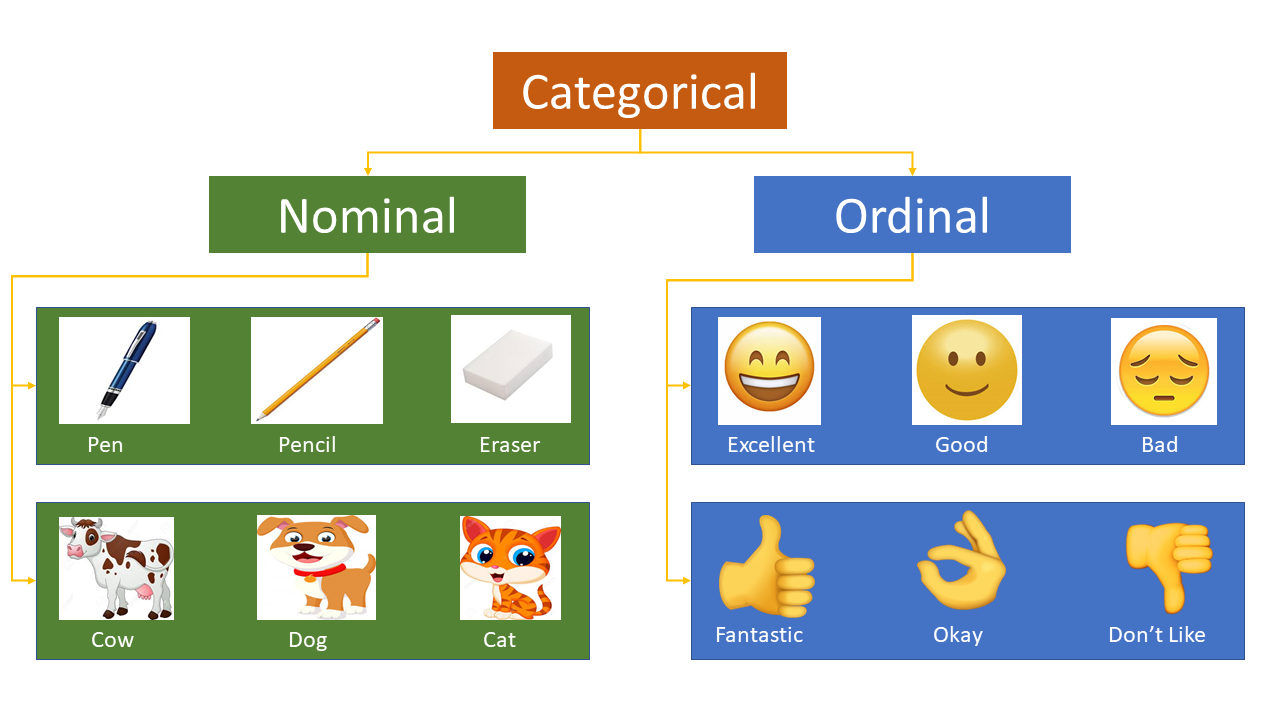

In [78]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/categorical_var.png'))

Is a `dog` _better_ than a `cow` or vice versa!? 
- No. There is no order
- It is __nominal__

Is `excellent` better than `bad`?
- Yes! There is an order
- It is __ordinal__

Categorical variables are typically stored as strings which represent various traits.
* Ordinal, E.g. temperature ("high", "medium", "low")
* Nominal, E.g. city name ("paris", "tokyo", "milan").

> Often I will do the _mistake_ of saying `categorical` when referring to `nominal`
> - It is actually common to do so
> - In the written notes we will strive to avoid this

What is the whole point about categorical values?
- Some machine learning algorithms can support categorical values without further manipulation 
  - **but there are many more algorithms that do not**. 
  - Therefore, we should convert these text attributes into numerical values for further processing.

###  Encoding Categorical Values

Machines and AI algorithms work well with numbers, less with strings
- We shall _encode_ categorical values in numbers!

#### Simple replacement encoding for output/label and ordinal

We start looking at simple encodings replacing values by their position in a list
- In many cases, this will not be enough!
  - It is fine for ordinal
  - It might not be fine for nominal
  - It is fine for target/label/`Y`



*Find and replace* of Pandas: 
- replace the text values with their numeric equivalent by using replace method.

In [79]:
# Encode target labels with value 1 for malignant and 0 for benign
dict_lb_to_num = {'malignant': 1, 'benign':0} # set malignat as true class
df_y.replace(dict_lb_to_num).head()

target
0       1
1       1
2       1
3       1
4       1

In [80]:
df_y.target.unique()
ordering=[0,1]

#dict(zip(df_y.target.unique(),range(len(df_y.target.unique()))))
dict(zip(df_y.target.unique(),ordering))

{'malignant': 0, 'benign': 1}

But what if 
- your attribute has several possible values? (cow, dog, cat, horse, ...)
- your dataset has many categoricasl values?
`
You would have to explicitly treat each value of each attribute
- This sounds like Spaghetti code ...
- This is error-prone...

Luckily, sklearn offers a function that takes care of it:
- [*sklearn.preprocessing.LabelEncoder*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 
- a class that offers several methods to transform non-numerical labels to numerical ones (e.g. guaranteeing that they contain only values between 0 and n_classes-1). 

> This transformer should be used to encode target values, i.e. y, and not the input X !!!
> - X values might need specific treatments

In [81]:
df_y[0:25]

target
0   malignant
1   malignant
2   malignant
3   malignant
4   malignant
5   malignant
6   malignant
7   malignant
8   malignant
9   malignant
10  malignant
11  malignant
12  malignant
13  malignant
14  malignant
15  malignant
16  malignant
17  malignant
18  malignant
19     benign
20     benign
21     benign
22  malignant
23  malignant
24  malignant

In [82]:
from sklearn.preprocessing import  LabelEncoder
# convert categorical variable (label) into numerical variable
le = LabelEncoder()
le.fit_transform(df_y)[0:25]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

Converting categorical ordinal variable (feature) into numerical variables
- it can be done in the same way

In [83]:
df_performance = pd.Series(["good", "bad", "optimal"], name='performance')
df_performance

0       good
1        bad
2    optimal
Name: performance, dtype: object

In [84]:
le.fit_transform(df_performance)

array([1, 0, 2])

> Pay attention! Numbers are assigned according to lexicographical ordering
> - It is just a coincidence here that we get 0-bad, 1-good, 2-optimal

#### Dummy variable for nominal categorical variables

In [85]:
# nominal categorical variables
df_city= pd.DataFrame({'city':["paris", "paris", "tokyo", "milan", "rome"]})
df_city

city
0  paris
1  paris
2  tokyo
3  milan
4   rome

In [86]:
print(df_city.city.values)
le.fit_transform(df_city.city)

['paris' 'paris' 'tokyo' 'milan' 'rome']


array([1, 1, 3, 0, 2])

Here we implicitly assigning an order to these cities
- Paris: 1
- Tokyo: 3
- Milan: 0
- Rome: 2

I.e., 
- Milan: 0
- Paris: 1
- Rome: 2
- Tokyo: 3

The order comes from the alphabetical order of the values
- But in the original data there was no ordering!
  - Why Milan and Tokyo are very far apart?
  - Why Milan is closer to Paris than to Rome?
  - Why Rome is closer to Tokyo than to Rome?
- This fictitious ordering might add bias to our AI model (e.g., a classifier)!

Luckily, we can solve this problem using __dummies__!
- [*pandas.get_dummies*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) convert categorical variable into dummy/indicator variables. 
- It expands 1 feature (one column) that can take N different values in 
  - N (indicator) features that take either value 0 or 1
  - For each row, exactly one of such indicator feature takes value 1 to denote the value of the original feature
- This is also called one-hot encoding.

In [87]:
df_city= pd.DataFrame({'city':["paris", "paris", "tokyo", "milan"]})
df_city

city
0  paris
1  paris
2  tokyo
3  milan

In [88]:
features_encoded = pd.get_dummies(df_city, columns=['city'])
features_encoded

city_milan  city_paris  city_tokyo
0           0           1           0
1           0           1           0
2           0           0           1
3           1           0           0

In [89]:
df_city['city_milan']=features_encoded['city_milan']
df_city

city  city_milan
0  paris           0
1  paris           0
2  tokyo           0
3  milan           1

#### Why is this important?

- Because we do not impose any ordering
- Several AI models use notions of Euclidean distance to take decision
  - Dummy variables do not impact on this!
  - Simple encodings have impact on this

In [90]:
#No impact on distance by dummy
from scipy.spatial import distance
paris = (0,1,0)
milan = (1,0,0)
tokyo = (0,0,1)

print('Dummies do not have impact the distace')
print(distance.euclidean(paris, milan))
print(distance.euclidean(milan, tokyo))
print(distance.euclidean(milan, paris))

Dummies do not have impact the distace
1.4142135623730951
1.4142135623730951
1.4142135623730951


In [91]:
#Impact on distance by simple replacement
print(df_city.city.values)
print(le.fit_transform(df_city.city))

paris = (1,)
milan = (0,)
tokyo = (2,)

print('Simple replacement impacts the distace')
print(distance.euclidean(paris, milan))
print(distance.euclidean(milan, tokyo))
print(distance.euclidean(milan, paris))

['paris' 'paris' 'tokyo' 'milan']
[1 1 2 0]
Simple replacement impacts the distace
1.0
2.0
1.0


> __Important! Golden Rules__

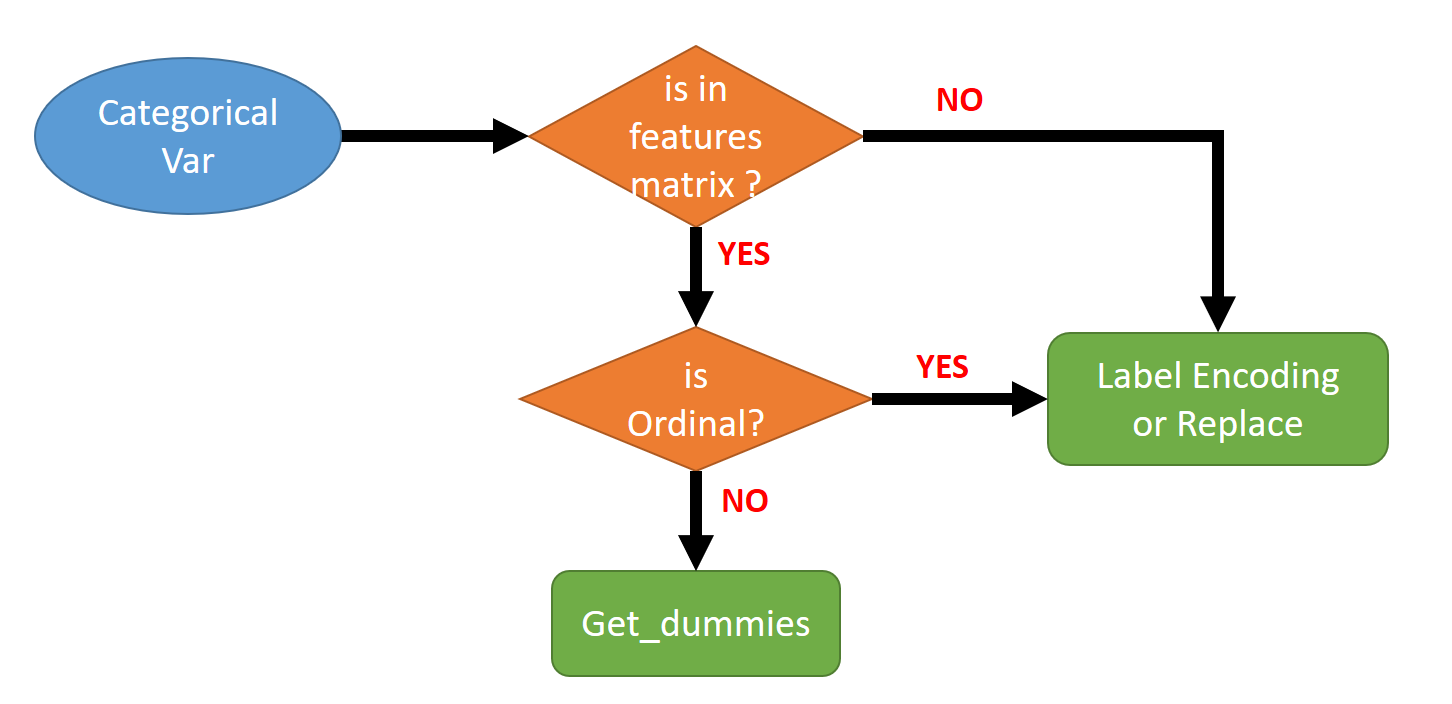

In [92]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/categorical_var_wf.png'))


<div class="alert alert-block alert-info" style='color:black'>
<b>Tip</b>      
We apply get_dummies when:

* The categorical (Nominal) variables are in features matrix

We apply Label Encoding or Replace when:
* The categorical variable is target array
* The categorical (Ordinal) variables are in features matrix
    
</div>

**Note:**
*A categorical variable that can take exactly two values is called a binary variable (e.g. off/on). In this case, the dummy variable can be created simply by replacing the values with 0/1.*

### Missing Values
<!-- It is not unusual for an object to be missing one or more attribute values -->

<!-- **Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.** To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

* [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html): Generate a boolean mask indicating missing values
* [notnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html): Opposite of isnull()
* [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html): Return a filtered version of the data
* [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html): Return a copy of the data with missing values filled 

you can find more details in the [APPENDIX](#APPENDIX). -->

There aren't null values in our dataset! 


In [93]:
print('Are there null target values?   ',df_y.isnull().values.any())
print('Are there null features values? ',df_X.isnull().values.any())

Are there null target values?    False
Are there null features values?  False


In [94]:
df_y[df_y.isnull().any(axis=1)]

Empty DataFrame
Columns: [target]
Index: []

In [95]:
df_y

target
0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
..         ...
564  malignant
565  malignant
566  malignant
567  malignant
568     benign

[569 rows x 1 columns]

In [96]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [97]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

> __We have material on this in the appendix!__

### Duplication

<!-- Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. 
 -->
We  check for duplicate instances in the breast cancer dataset:
* [*duplicated()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html): return boolean Series denoting duplicate rows.

In [98]:
dups = data.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [99]:
print(f'Are there duplicate rows? = {dups.any()}')
data = data.drop_duplicates() #  drop_duplicates return DataFrame with duplicate rows removed.

Are there duplicate rows? = False


__There aren't duplicate instances!__

### Scaling
<!-- ![](images/standardization.jpg) -->

Dataset can contains different magnitude, units and range. 
- Weight in kg (0-100) vs Height in meters (1-2)
- Certain AI algorithm might focus too much on columns with larger magnitude
  - They might give more importance to weight than to height


It is advisable to bring all numeric values to the same _scale_
- Scaling is a method used to _normalize/homogenize the range_ of independent variables or features of data. 

#### Why is scaling important?

> Scaling, explained by someone who knows it for real :D

In [100]:
from IPython.display import HTML
# Why Data Scaling is important in Machine Learning
HTML('<iframe width="800" height="550" src="https://www.youtube.com/embed/-xOUOo82kWY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Example from slides/video: Why is data scaling important?

In [101]:


# 3 people A,B,C
df_cm_kg = pd.DataFrame({'height_cm':[180,180,100 ], 'weight_kg':[70,69,69.1]}, index=['Dad','Mon','Son'])
df_m_gr = pd.DataFrame({'height_m':[1.8,1.8,1.0], 'weight_gr':[70000,69000,69100]}, index=['Dad','Mon','Son'])

print('Data in cm and kg')
print(df_cm_kg)
print()
print('Data in m and gr')
print(df_m_gr)


Data in cm and kg
     height_cm  weight_kg
Dad        180       70.0
Mon        180       69.0
Son        100       69.1

Data in m and gr
     height_m  weight_gr
Dad       1.8      70000
Mon       1.8      69000
Son       1.0      69100


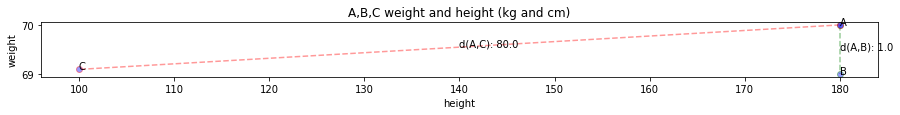

In [102]:
from ipdpp_utils import draw_euclidean_distance

# Draw a scatter plot DF cm and kg
# get A, B, C
A = df_cm_kg.iloc[0,:]
B = df_cm_kg.iloc[1,:]
C = df_cm_kg.iloc[2,:]
draw_euclidean_distance(A,B,C)

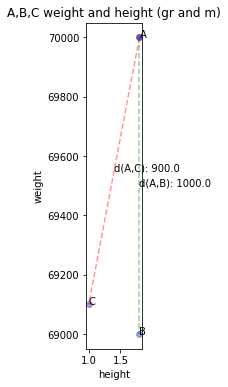

In [103]:
# Draw a scatter plot DF m and gr
# get A, B, C
A = df_m_gr.iloc[0,:]
B = df_m_gr.iloc[1,:]
C = df_m_gr.iloc[2,:]
draw_euclidean_distance(A,B,C,figsize=(1,6),title='A,B,C weight and height (gr and m)')

**To sumup, why is scaling important?**
1. It helps comparing the distribution of values of different features...
  - Otherwise the differences between values of features might be very high to observe on plot

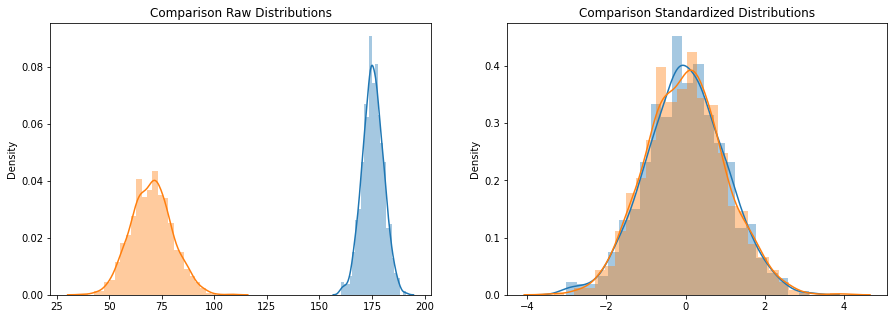

In [104]:
import numpy as np
np.random.seed(42)

# create dataset Weight normal(70,10) and  Height normal(175,5)
df_w = pd.DataFrame({'Weight': np.random.normal(70, 10, 1000)})
df_h = pd.DataFrame({'Height': np.random.normal(175, 5, 1000)})

# plot raw distributions
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Comparison Raw Distributions')
sns.distplot(df_h, ax=ax[0])
sns.distplot(df_w,ax=ax[0])

# plot raw distributions
ax[1].set_title('Comparison Standardized Distributions')
sns.distplot(df_h.apply(lambda x: (x-x.mean())/x.std()), ax=ax[1])
sns.distplot(df_w.apply(lambda x: (x-x.mean())/x.std()), ax=ax[1])
plt.show()

**To sumup, why is scaling important?**

2. Many ML algorithms calculate and use the Euclidean distance between points 
   - During the training phase. 
   - The range of all features should be made homogeneous so that each feature contributes proportionately to the final distance.

[*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) standardizes the features by removing the mean and scaling to unit variance. The standard score (*z-scores*) of a sample x is calculated as:

`z = (x - u) / s`

That is, from each value we
- remove its mean `u` (the mean of values in its column
- we divide it by the standard deviation of the values in its column (`s`)

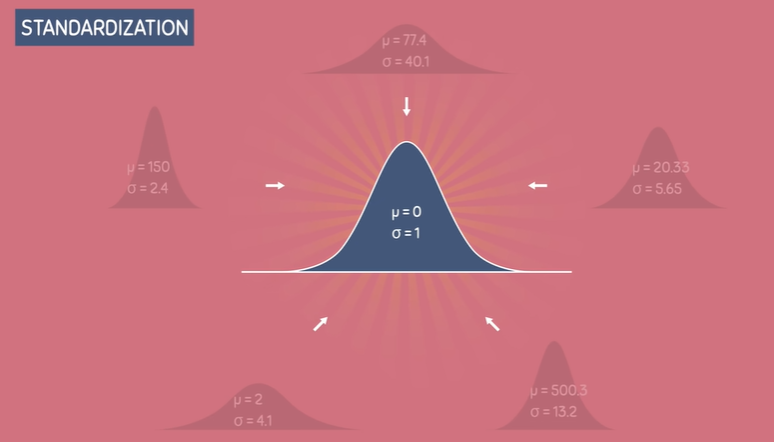

image from https://youtu.be/2tuBREK_mgE?t=165


In [105]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/standardization.png'))
print('image from https://youtu.be/2tuBREK_mgE?t=165')

In [106]:
df_X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [107]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_X.values)
scaled_features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [108]:
df_X_scaled = pd.DataFrame(scaled_features, index=df_X.index, columns=df_X.columns)
df_X_scaled#.head(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  ...  worst radius  worst texture  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     worst concavity  worst concave points  worst symmetry  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

In [109]:
df_X#.head(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Very important
- The `scaler` object contains information to bring back each scaled value to its original value!

In [110]:
scaler.inverse_transform(df_X_scaled.values)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [111]:
#What does it mean to apply the scaling, mathematically?
#df_X.apply(lambda x: (x - x.mean())/x.std())
#What does it mean to get back to the original value, mathematically?
#df_X_scaled.values * np.sqrt(scaler.var_) + scaler.mean_

## Visualization and Trends

### Count Plot

Let's see how the observation divide/distribute according to the target label
<!-- The plot below represents the class distribution of malignant and benign samples. -->

* we have 212 malignant (around 37% of the data) and
* 357 benign breast cancer masses (63%).

Count plot visualization is done by this function
- [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

<AxesSubplot: xlabel='target', ylabel='count'>

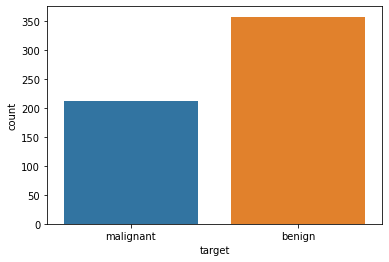

In [112]:
sns.countplot(data=df_y,x='target')

target   
benign       357
malignant    212
dtype: int64

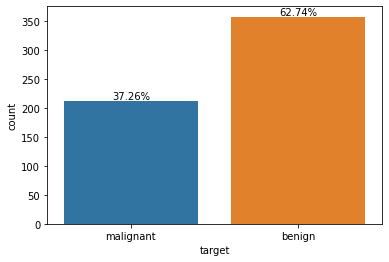

In [113]:
#Show the counts of observations for each categorical value using bars.(a histogram for a categorical variable)
#ax = sns.countplot(df_y) # Returns the matplotlib Axes object
ax = sns.countplot(data=df_y,x='target') # Returns the matplotlib Axes object

# gets shapes and draws annotations
for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:1.2f}%'.format(height/len(df_y)*100), ha="center") 

df_y.value_counts() # Return a Series containing counts of unique values.

 We plot features in 3 groups and each group includes 10 features to observe better.

<!-- As the dataset contain many variables, and relationship between each and every variable is to be analysed, a pair plot is used to visualize the data further. 

It shows the data as a collection of points.  The position of one variable in the same data row is matched with another variable’s value. Each value is a position on either the vertical or horizontal dimension indicates its correlation.  -->

### Scatterplot Matrix

* It shows both the distribution of single variables and the relationships between pairs of variables.
* It is an effective method to identify trends for analysis.

We have seen that this can be obtained using pandas scatter_matrix

Another option is offered by seaborn
- [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- see https://www.python-graph-gallery.com/
- This is somehow more conveniente for AI projects. 
   - E.g. it allows to highlight information from the target variable!
   - Instead, pandas scatter_matrix ignores the target (it is of type string)

Before this, for simplicitly, we separate the columns containing 
- mean values
- standard errors
- worst cases

In [115]:
df_X_scaled

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  ...  worst radius  worst texture  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     worst concavity  worst concave points  worst symmetry  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

In [116]:
df_X_mean  = df_X_scaled.iloc[:,:10]
df_X_se    = df_X_scaled.iloc[:,10:20]
df_X_worst = df_X_scaled.iloc[:,20:30]

In [117]:
df_X_mean

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  
0                  2.255747  
1                 -0.868652  
2                 -0.398008  
3                  4.910919  
4                 -0.562450  
..                      ...  
564               -0.931027  
565               -1.058611  
566               -0.895587  
567                1.043695  
568               -0.561032  

[569 rows x 10 columns]

Now, we attach the columns with mean to the target variable
- we merge using the indexes of the tow dataframs
- is it inner/outer/left/right!? It does not matter! We have the same indexes by construction!

In [118]:
df_mean = df_X_mean.merge(df_y,left_index=True, right_index=True)
df_mean

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension     target  
0                  2.255747  malignant  
1                 -0.868652  malignant  
2                 -0.398008  malignant  
3                  4.910919  malignant  
4                 -0.562450  malignant  
..                      ...        ...  
564               -0.931027  malignant  
565               -1.058611  malignant  
566               -0.895587  malignant  
567                1.043695  malignant  
568               -0.561032     benign  

[569 rows x 11 columns]

If using pandas scatter_matrix...

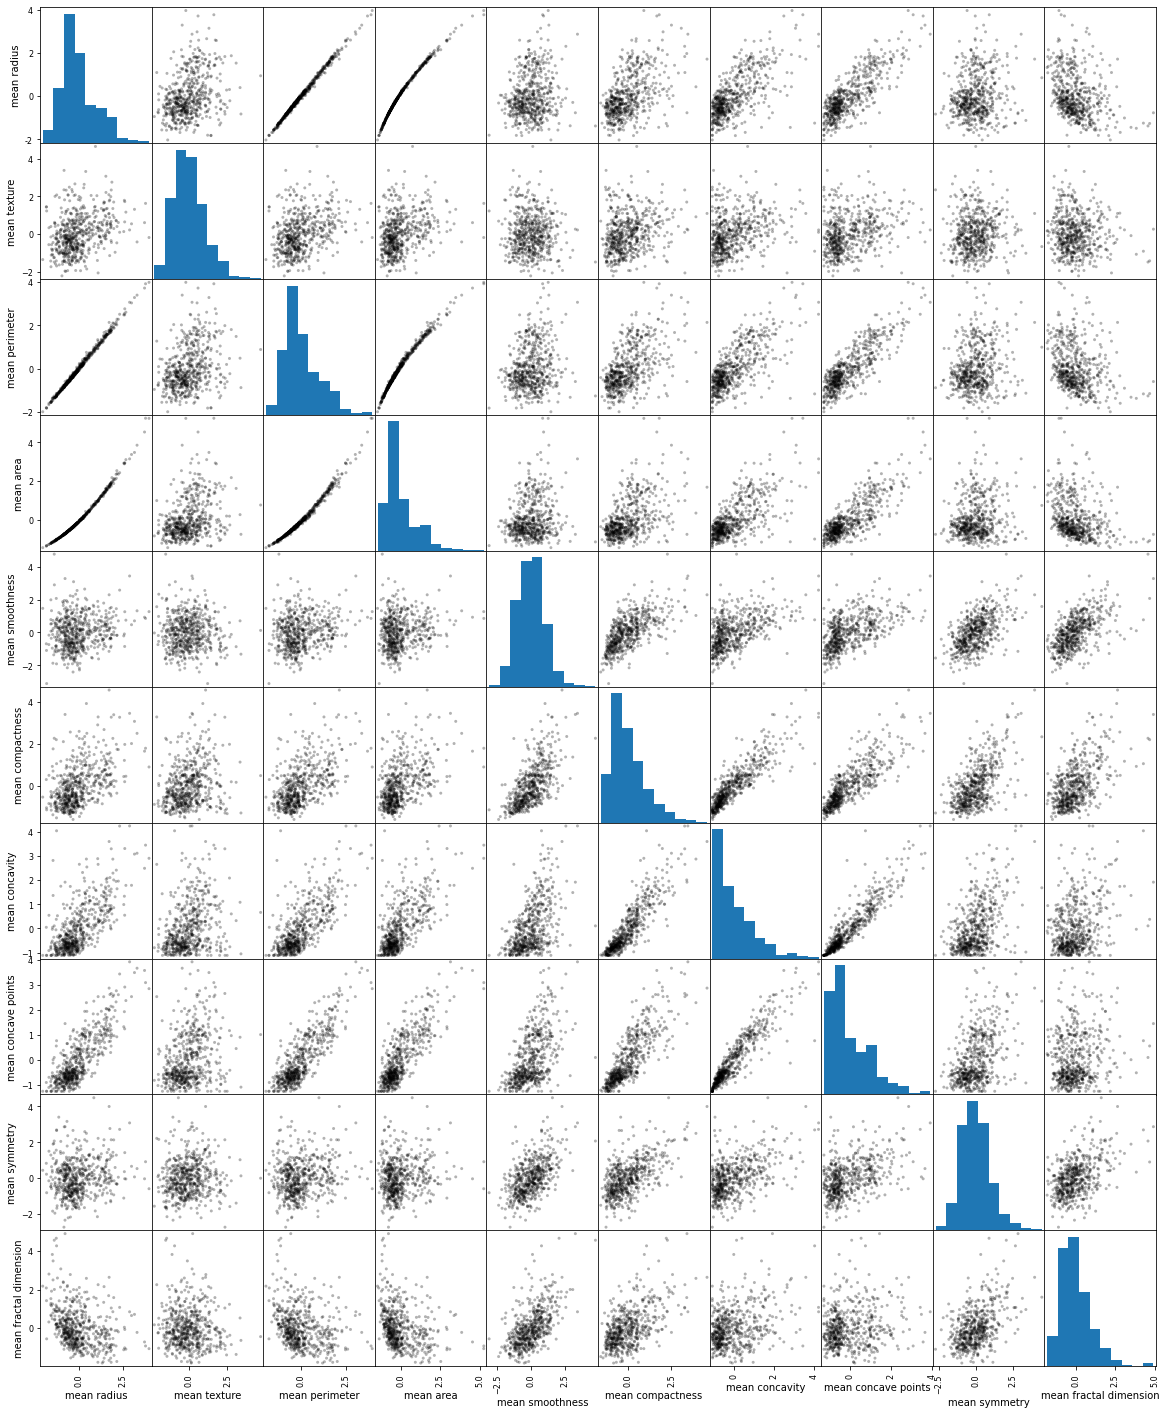

In [119]:
pd.plotting.scatter_matrix(df_mean,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

If using seaborn

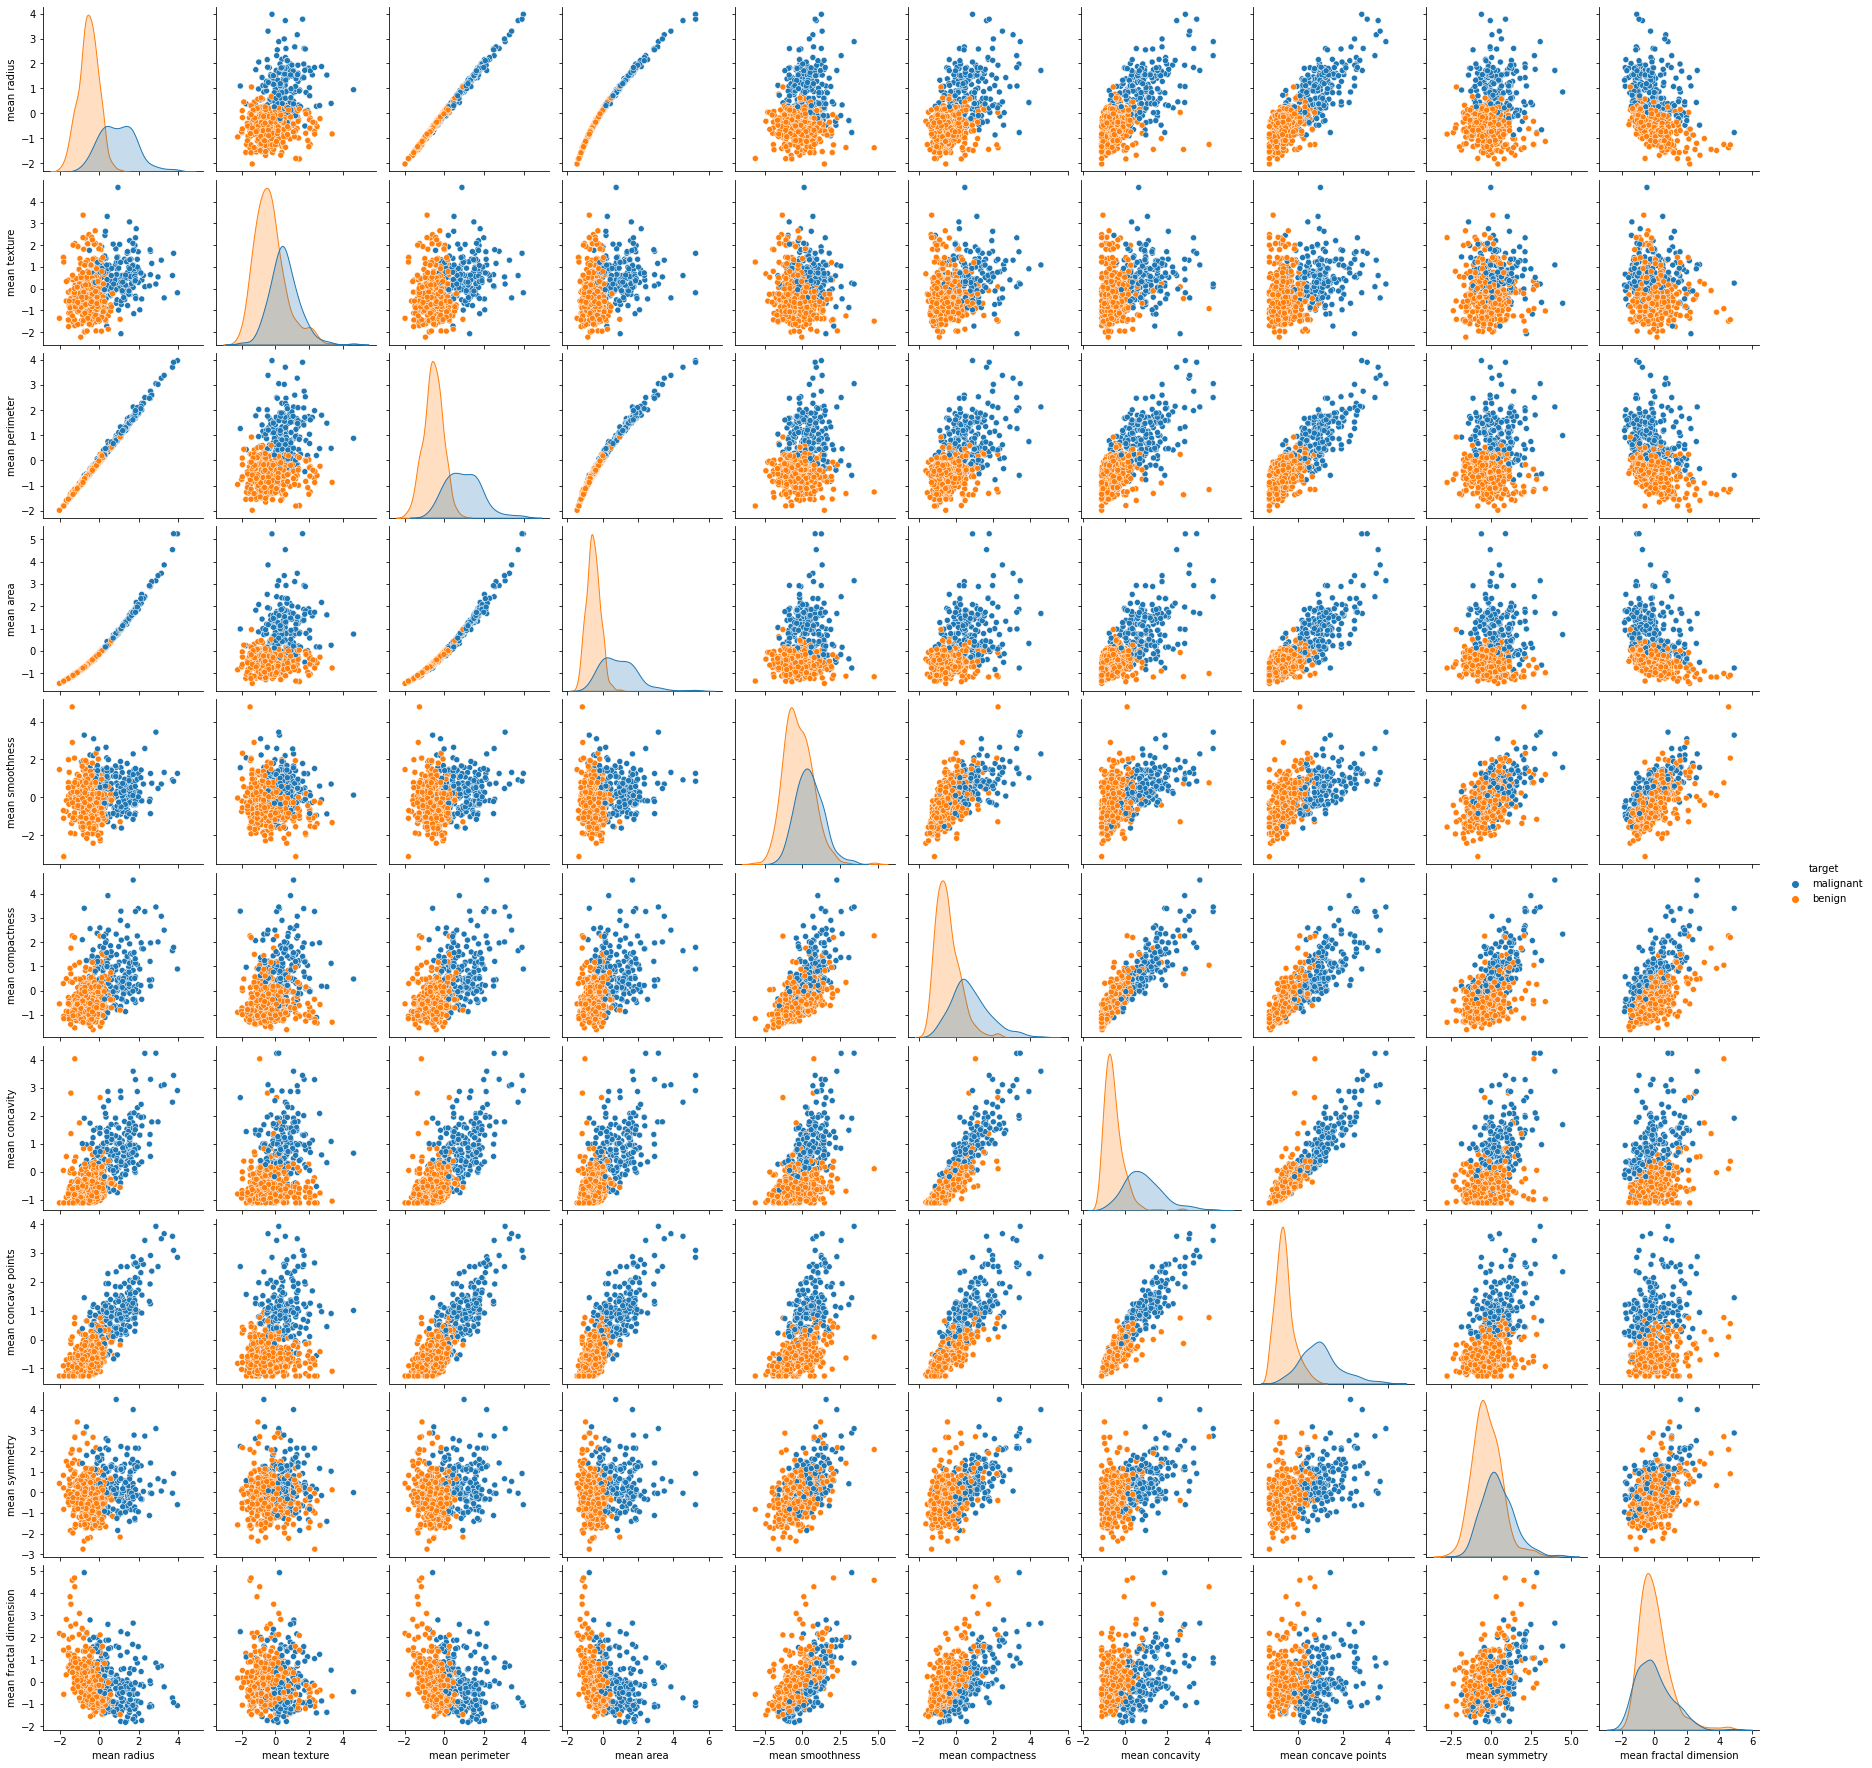

In [120]:
# sns.set(font_scale=1.5)

#Plot pairwise relationships in a dataset.
sns.pairplot(df_mean, hue='target')  #hue: Grouping data points with different colors
# sns.pairplot(df_X_se.merge(df_y,left_index=True, right_index=True),  hue='target')
# sns.pairplot(df_X_worst.merge(df_y,left_index=True, right_index=True),  hue='target')
# ax.set_yticklabels(rotation=90)
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *radius*, *area* and *perimeter* characteristics are closely related.
2. The benign tumors have smaller cell nuclei and  Binomial distribution (for *radius*, *area* and *perimeter*)
</div>

### Violin plot

The seaborn pairplot helps in visualizing/comparing the distribution of values of features, grouped by target value
- A better type of plot for this specific task is the violing plot [*seaboarn.violinplot*](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- It used to represent comparison of a variable distribution (or sample distribution) across different "categories".

In order to use the violin plot, we need to [_melt_ the dataframe](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
- We make a new dataframe with 3 columns: target, feature, and value
- For each row in the original dataframe, we add N many lines, with N the number of features,  
    - each containing feature name, and feature 
- We pivot the dataframe on the target variable

In [123]:
df_mean

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension     target  
0                  2.255747  malignant  
1                 -0.868652  malignant  
2                 -0.398008  malignant  
3                  4.910919  malignant  
4                 -0.562450  malignant  
..                      ...        ...  
564               -0.931027  malignant  
565               -1.058611  malignant  
566               -0.895587  malignant  
567                1.043695  malignant  
568               -0.561032     benign  

[569 rows x 11 columns]

In [125]:
#pd.melt(df_mean,id_vars="target",var_name="features", value_name='value')
# Unpivot the DataFrame from Wide to long format  |Target | Features| Value | [https://bit.ly/3j2Qj1O]
data_for_violinplot = pd.melt(df_mean,id_vars="target",var_name="features", value_name='value')

data_for_violinplot.tail()

target                features     value
5685  malignant  mean fractal dimension -0.931027
5686  malignant  mean fractal dimension -1.058611
5687  malignant  mean fractal dimension -0.895587
5688  malignant  mean fractal dimension  1.043695
5689     benign  mean fractal dimension -0.561032

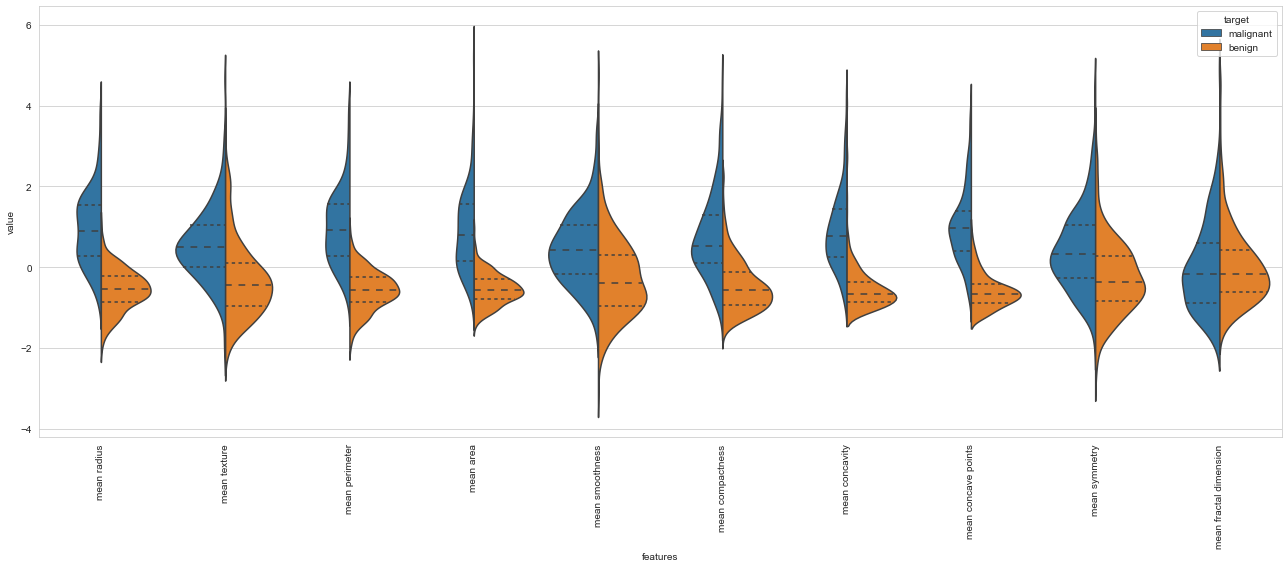

In [122]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
#df_mean = pd.concat([df_X_mean, df_y], axis=1) 

#violin plot
sns.violinplot(x="features", y="value", hue="target", data=data_for_violinplot, split=True, inner="quart" )
# sns.swarmplot(x="features", y="value", hue="target", data=data_for_violinplot)
plt.xticks(rotation=90) 
plt.tight_layout()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  

1. The *mean concave points*, *mean concavity* and *mean area* have well seperated distribution on target variable 
    - An indication that they __might__ be good predictors
2. The *mean fractal dimension*, *mean symmetry* and *mean smoothness* have similar distribution on target variable
    - An indication that they __might not__ be good predictors
</div>


## Outliers Detection
Outliers detection is sometimes 'an art'
- There is not ready made recipe that always work.
- But there are several _approaches/rules_ that can be used/attempted.

In this sections we are going to list and discuss some of these.

Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid.
- Or... the might just be some real but unusual observations... 

*Why finding outliers is important?*
* They might be invalid data (human error, erroneous procedures, instrumentation error, calibration error)
* They might give insights on the observed system 
  - In case outliers are unexpected but _real_ data
  - Outliers might denote problems in the observed system (e.g., unexpected very high delays in treatment of tumours)
* Summarize data by statistics that represent the majority of the data
  - By ignoring outliers, or by using measures that are not _too much affected_ by them
* Train a model that generalizes to new data (remove outliers only in the training set)
  - Golden rule: __never touch the test set__

In [ ]:
from IPython.display import HTML
# Why is it important to identify and understand outliers
HTML('<iframe width="800" height="500" src="https://www.youtube.com/embed/Ua-lbOmO2NM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### InterQuartile Range 
The Tukey’s boxplot is often used to pinpoint possible outliers: 

1. A box is drawn from the [ﬁrst quartile Q1](https://en.wikipedia.org/wiki/Quartile) to the third quartile Q3 of the data 
   - Q1 is greater than 25% of the data
   - Q3 is greater than 75% of the data
1. Calculate the Interquartile Range  IQR = Q3 − Q1
1. Mark the points outside the interval [Q1 − 1.5 IQR, Q3 + 1.5 IQR], as __possible__ outliers
   - This is the so-called the fence (or whisker) interval
   
   
> This comes for free in seaborn using the `boxplot` function   

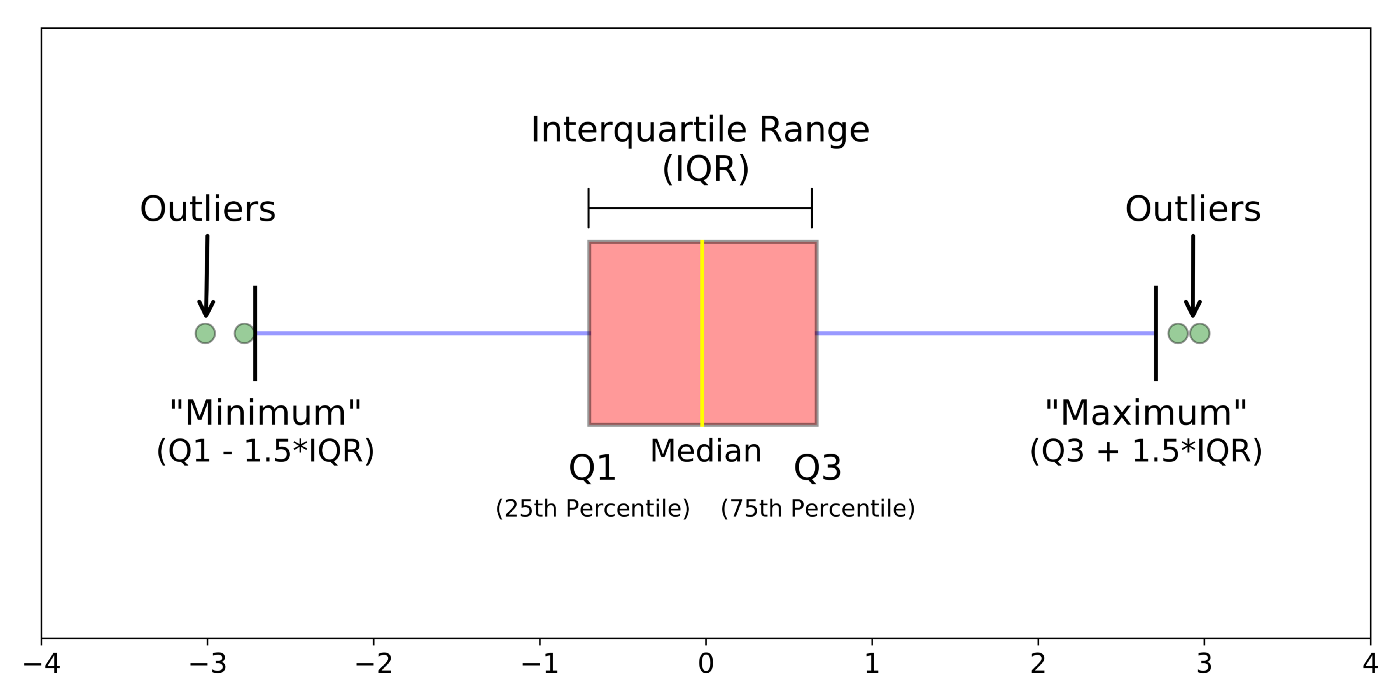

In [126]:
display(Image(url_github_repo+'jupyter/jupyterNotebooks/images/box_plot_ref_needed.png'))

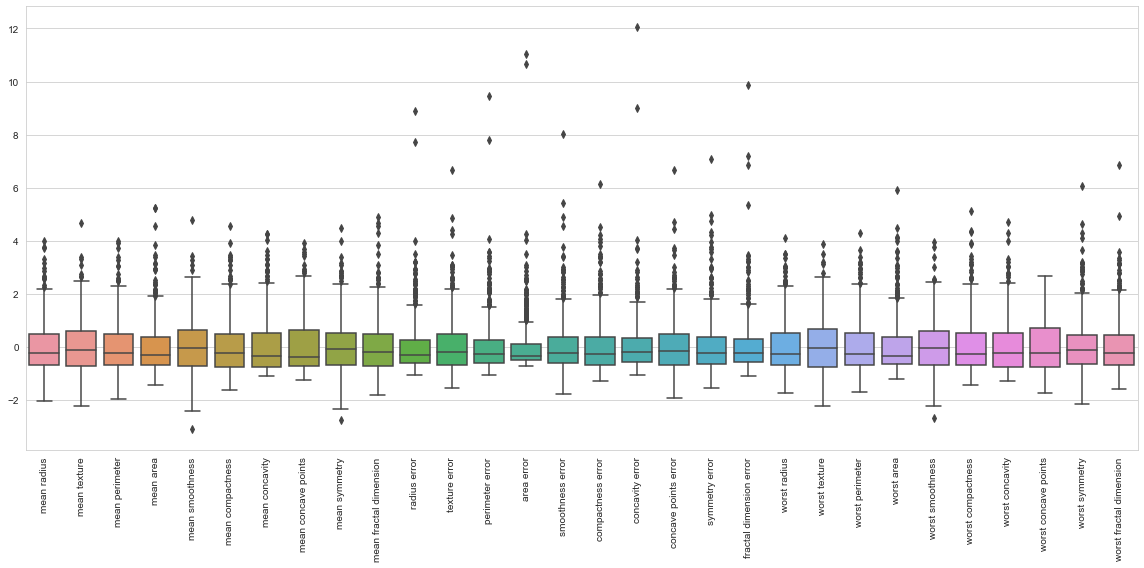

In [127]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled ) 
plt.xticks(rotation=90)  
plt.tight_layout()


$$possible\_outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0&   & (Q1 - 1.5 * IQR)\leq x \leq (Q3 + 1.5 * IQR) \\
    1&   & Otherwise 
  \end{aligned}
  \right.
\end{equation}
$$

where $x$ is denotes a parameter value

In [ ]:
#mask df_X.apply(lambda x: isOutlier(x)).any(axis=1)
#df_X.apply(isOutlier)

In [128]:
def isOutlier(x , k = 1.5):
    # Return True if x < (Q1 - 1.5 * IQR) OR  x > (Q3 + 1.5 * IQR)
    IQR = x.quantile(0.75)-x.quantile(0.25) # Q3 - Q1 
    
    minimum = x.quantile(0.25) - k * IQR    # Q1 - 1.5 IQR
    maximum = x.quantile(0.75) + k * IQR    # Q3 + 1.5 
    return (x < minimum) | (x > maximum )

#Note: any on axis=1 will given me true for any row that contains at least one 
df_X_clean_iqr = df_X[df_X.apply(isOutlier).any(axis=1)]
#df_X_clean_iqr = df_X_scaled[df_X_scaled.apply(isOutlier).any(axis=1)]
#df_X_clean_iqr = df_X[df_X.apply(lambda x: isOutlier(x)).any(axis=1)]


# ~ is used to invert a boolean Series, https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
# numpy.all Test whether all array elements along a given axis 1 evaluate to True. 
# we use ~isOutlier as dataframe mask to filter outliers
# you can obtain the same result with: 
#df_X_scaled[~df_X_scaled.apply(lambda x: isOutlier(x))].dropna()
print("How many candidate outliers?",len(df_X_clean_iqr))
df_X_clean_iqr

How many candidate outliers? 171


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760          0.3001              0.14710         0.2419   
1             0.07864          0.0869              0.07017         0.1812   
2             0.15990          0.1974              0.12790         0.2069   
3             0.28390          0.2414              0.10520         0.2597   
4             0.13280          0.1980              0.10430         0.1809   
..                ...             ...                  ...            ...   
563           0.22360          0.3174              0.14740         0.2149   
564           0.11590          0.2439              0.13890         0.1726   
565           0.10340          0.1440              0.09791         0.1752   
567           0.27700          0.3514              0.15200         0.2397   
568           0.04362          0.0000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
563                 0.06879  ...        24.290          29.41   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
563           179.10      1819.0           0.14070            0.41860   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
563           0.6599                0.2542         

> *NOTE:* the boxplot assumes symmetry in the data
> - The amount we add to Q3 is the same as what we subtract from Q1.
> - For asymmetric distributions, such _symmetric_ boxplot might ﬂag many regular data points as outliers.

### Z-Score
Another example of rule to detect outliers is the one based on **z-scores** (that we introduced before)
- **This technique assumes a Gaussian distribution of the data**. 
- Intuitively: we mark as outliers data points that are in the tails of the distribution and therefore far from the mean.

$$outlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    1&   &|x-\hat{x}| > 3 \sigma \\
    0&   &|x-\hat{x}| \leq 3 \sigma 
  \end{aligned}
  \right.
\end{equation}
$$

where $x$ is a parameter value, $\hat{x}$ the mean of the parameter, and $\sigma$ is its standard deviation.

More precisely, the rule ﬂags $x$ as **outlyier if |z| exceeds 3**, say.
- I.e., as outliers are considered all the absolute values plotted over the value 3 on the y axis. 
- This cutoff is based on the fact that when the data are normally distributed, 99.7% of the observations fall within 3 standard deviations around the mean.


In [ ]:
df_X_outlier_z = df_X_scaled[df_X_scaled.apply(lambda x: np.abs(x) > 3).any(axis=1)] 
print("How many outliers?",len(df_X_outlier_z))

### Extreme Outlier

Not all outliers are _wrong_
- Most of the times, they just are rare points

However, extreme outliers (i.e., points that are very far off)
- might indicate invalid data

#### Boxplot
In order to spot extreme outliers, we might, e.g., use a more aggressive interquartile range criteria
- We could idenfity values that fall outside of 3 times the inter-quartile range (IQR), rather than 1.5 as done before (Tukey 1977).

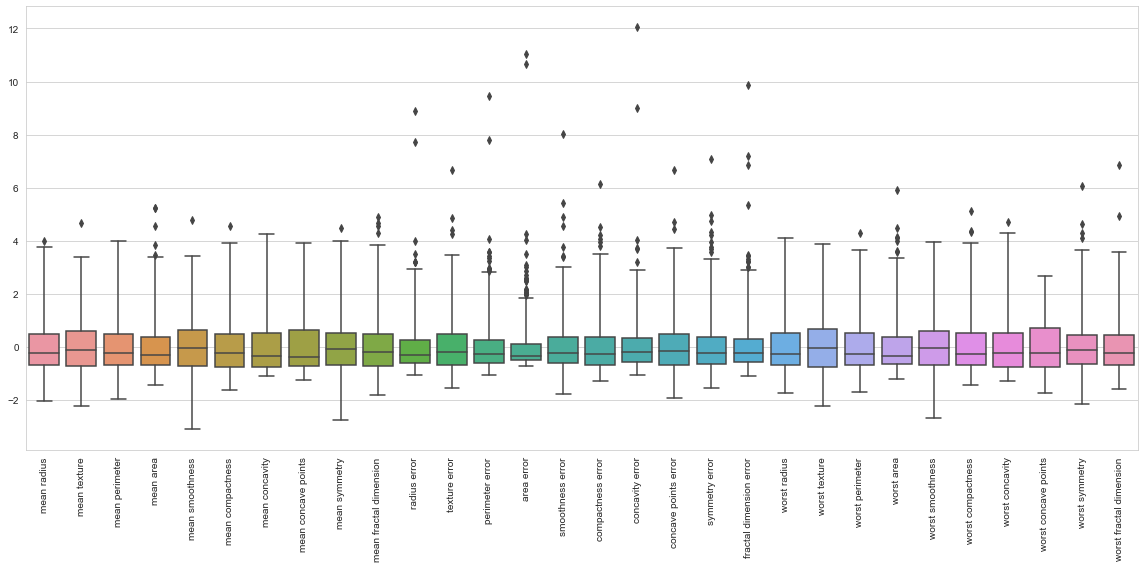

In [129]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled, whis= 3.0 )
plt.xticks(rotation=90)  
plt.tight_layout()


$$extremeOutlier(x)=\begin{equation}
\left\{ 
  \begin{aligned}
    0&   & (Q1 - 3 * IQR)\leq x \leq (Q3 + 3 * IQR) \\
    1&   & Otherwise 
  \end{aligned}
  \right.
\end{equation}
$$

where $x$ is the parameter values

In [130]:
################################
def isExtremeOutlier(x):
    return isOutlier(x , 3)

df_X_clean_iqr_extreme = df_X[df_X.apply(lambda x: isExtremeOutlier(x)).any(axis=1)]
print("How many extreme outliers?",len(df_X_clean_iqr_extreme))

How many extreme outliers? 56


#### Visual Approach
We can use a "visual" approach for detection 
- based on density of the points above a specific threshold
- of the outliers (very far from the mean). 

We notice a not very dense region of points above the value 6 (6 times IQR).
    
We suspect there are some mistakes

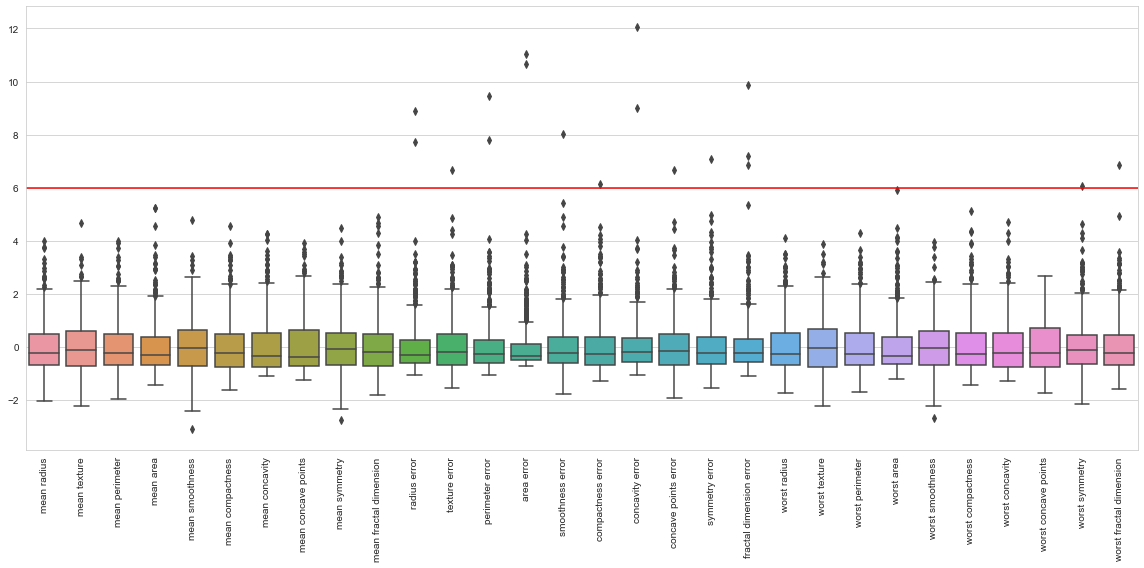

In [131]:
plt.figure(figsize=(16,8))
sns.boxplot( data = df_X_scaled ) 
plt.xticks(rotation=90) 
plt.axhline(y=6, color='r', linestyle='-')
plt.tight_layout()

In [133]:
# getting outilers data for discussing with domino experts
df_X_extreme_outlier=df_X_scaled[df_X_scaled.apply(lambda x: np.abs(x) > 6).any(axis=1)] 
print("How many extreme outliers?",len(df_X_extreme_outlier))

df_X_extreme_outlier 



How many extreme outliers? 12


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
9      -0.473535      1.105439       -0.329482  -0.509063         1.582699   
68     -1.447987     -0.456023       -1.366651  -1.150124         0.728714   
71     -1.488033     -1.082004       -1.366651  -1.168611         0.104593   
78      1.719055      1.089149        2.130809   1.678336         2.294354   
152    -1.248609     -0.919110       -1.161112  -1.008772         0.771413   
190     0.026330      0.891349        0.098896  -0.127954         0.792763   
192    -1.251733     -0.248914       -1.286742  -1.043186        -1.911524   
212     3.971288     -0.190738        3.976130   5.244841         1.269571   
213     0.935176      1.459153        0.928055   0.833637         0.301721   
290     0.080293      0.102473        0.167272  -0.011061        -0.625564   
461     3.775318      1.624375        3.910226   5.250529         0.856812   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3            3.402909        1.915897             1.451707       2.867383   
9            2.563358        1.738872             0.941760       0.797298   
68           0.700428        2.814833            -0.133333       1.093024   
71           0.924055       -0.034392            -0.521016       0.329977   
78           4.568425        3.598263             2.875535       3.995524   
152          1.052926        4.042709             0.764814       2.688487   
190          2.595576        1.372267             0.445226       2.089732   
192         -1.533193       -1.114873            -1.261820      -0.579108   
212          0.895628        2.903973             2.852321      -0.597362   
213          0.194424        0.996873             0.439809      -1.838683   
290          1.198852        0.595114             0.441099      -0.356400   
461          1.790138        3.448859             3.094784       0.910477   

     mean fractal dimension  ...  worst radius  worst texture  \
3                  4.910919  ...     -0.281464       0.133984   
9                  2.783096  ...     -0.244190       2.443109   
68                 2.503828  ...     -1.234044      -0.492965   
71                 3.827870  ...     -1.353531      -1.629614   
78                 2.639918  ...      1.470454       0.984029   
152                4.275833  ...     -1.087016      -1.007551   
190                1.789355  ...     -0.109586       1.873156   
192                0.237079  ...     -1.304866      -0.789340   
212               -1.069952  ...      2.452025      -1.173652   
213               -0.586549  ...      0.372916       0.389649   
290                1.293194  ...     -0.103373      -0.577643   
461               -0.931027  ...      4.094189       0.927033   

     worst perimeter  worst area  worst smoothness  worst compactness  \
3          -0.249939   -0.550021          3.394275           3.893397   
9          -0.286278   -0.297409          2.320295           5.112877   
68         -1.243893   -0.977194          0.693984           1.159269   
71         -1.331463   -1.048038         -0.511503          -0.067845   
78          1.877663    1.305104          1.382207           2.303684   
152        -1.078879   -0.879102         -0.138898           0.145898   
190        -0.025652   -0.207756          0.917547           4.315794   
192        -1.340697   -1.013934         -2.682695          -1.443878   
212         2.419765    2.845036         -0.796437          -0.653093   
213         0.391350    0.246841         -0.353694          -0.476882   
290        -0.165645   -0.199142         -1.426358          -0.044944   
461         4.287337    5.930172          0.146035           1.089930   

     worst concavity  worst concave points  worst symmetry  \
3           1.989588              2.175786        6.046041   
9           3.995433              1.620015        2.370444   
68    

### What to do with outliers?

Once you have identified candidate outliers 
- You shall discuss them with domain experts!
- They will tell you whether they are valid data or not

In [134]:
import os

dir = "data" #os.path.join("C:\\", "temp", "python")
if not os.path.exists(dir):
    os.mkdir(dir)

In [135]:
# saving unscaled outilers data and save them into a CSV file and send it to doctors 
data_outlier_noscaled = scaler.inverse_transform(df_X_extreme_outlier)


df_X_outlier_noscaled = pd.DataFrame(data_outlier_noscaled, index=df_X_extreme_outlier.index, columns=df_X_extreme_outlier.columns)
#df_to_check = df_X_outlier_noscaled.join(df_y)
df_to_check = df_X_outlier_noscaled.merge(df_y,left_index=True, right_index=True)
#df_X_mean.merge(df_y,left_index=True, right_index=True)


df_to_check.to_csv("data/WBCD_outliers_for_doctors.csv")

Outlier detection is important in medical applications* as well as in many other applications 
- that require to focus on uncommon activities. 
- **It can identify potential patient management errors or problems with the instrumentation.**


### We drop the 12 identified extreme outliers!

**Let's assume that the doctors confirm that the 12 outliers we found
are invalid data that we can then eliminate from our analysis** 
- Or replace outliers with a fixed value, e.g., the median of their distribution.

<div class="alert alert-block alert-warning" style='color:black'>
<b>NOTE:</b>
Before removing them we should discuss with domain experts to understand why these points are not valid (for example, the measuring equipment failed, the measurement method was unreliable for some reason, there were contaminants, etc ...).
</div>

In [136]:
# remove no valid data in original features matrix
df_X_clean = df_X[df_X.apply(lambda x:  ((x-x.mean())/x.std()) < 6).all(axis=1)]
print('We have dropped',df_X.shape[0]-df_X_clean.shape[0],'extreme outliers')

We have dropped 12 extreme outliers


In [137]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>

**it’s important to investigate the nature of the outlier before deciding whether to drop it or not.**
* <div class="alert alert-block alert-warning" style='color:black'> <b>DROP</b> <br>If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.</div>

- For example a year field with a '9999' value. This is can be a human, instrument error or calibration error. 
- **NOTE: if you remove invalid data you have to redo the whole analysis (e.g. scaling )**

* <div class="alert alert-block alert-warning" style='color:black'><b>DROP AND EXPLAIN WHY</b>
    <br>Often, outliers can affect the results. In this situation, it is not legitimate to simply drop outliers.
</div>
If unsure, you may run the analysis both with and without it.
- For example, you can remove the outliers (*only in the training dataset used to build the model*) and compare the result with the model obtained from raw data (with outliers). We will talk about predictive models, training sets and testing sets in the next lesson.


More generally, removing outliers or not depends on your purpose, and from that it should become clear whether the outlier should be removed. 

> We saw some simple univariate outlier detection techniques,  you can find more details in the [APPENDIX](#APPENDIX).

## Correlation
Before talking about correlation, let me remind you:
- Correlation is not causation! 🤣
  - https://www.tylervigen.com/spurious-correlations
  - https://www.wnycstudios.org/podcasts/otm/articles/spurious-correlations

A correlation matrix is a table showing correlation coefficients between every pair of variables. 
- Each cell in the table shows the correlation between two variables.
- A correlation matrix is used 
   - to summarize data and 
   - as a diagnostic for advanced analyses. 

In seaborn, we easily get it graphically using [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [138]:
from IPython.display import HTML
# Correlation and Redundant Features
HTML('<iframe width="800" height="450" src="https://www.youtube.com/embed/O0tOmWULrf8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

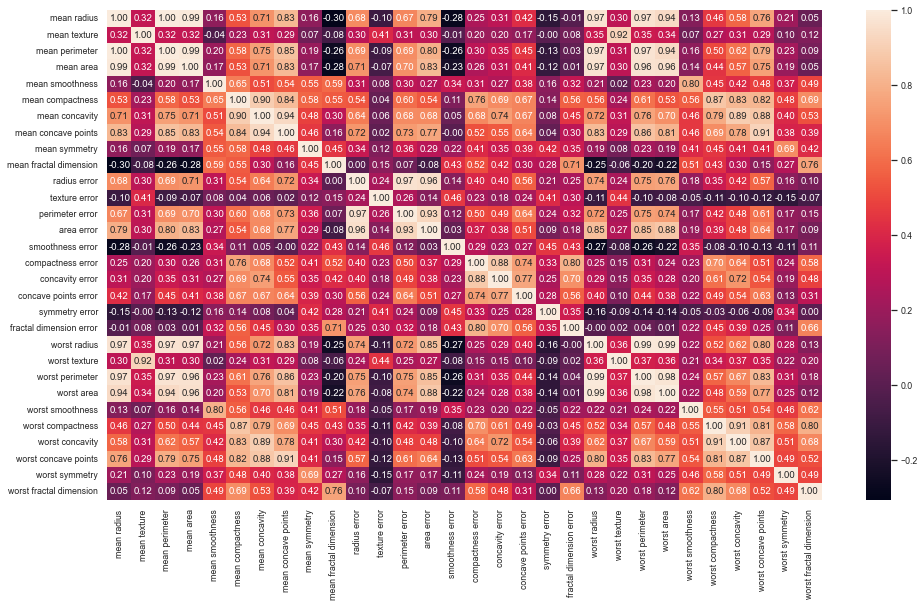

In [139]:
sns.set(font_scale=0.8)
plt.figure(figsize=(16,9))
sns.heatmap(df_X_clean.corr(),  square = False, annot=True, fmt=".2f")
plt.show()

### Discovering structure in heatmap data

We can use the correlations as distances among variables
- With this inteprepation, we can run a hierarchical clustering algorithm in order to group together _close_ variables
  - We will see more about clustering in next class

In seaborn, we get a hierarchically-clustered heatmap, a _clustermap_ using [seaborn.clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

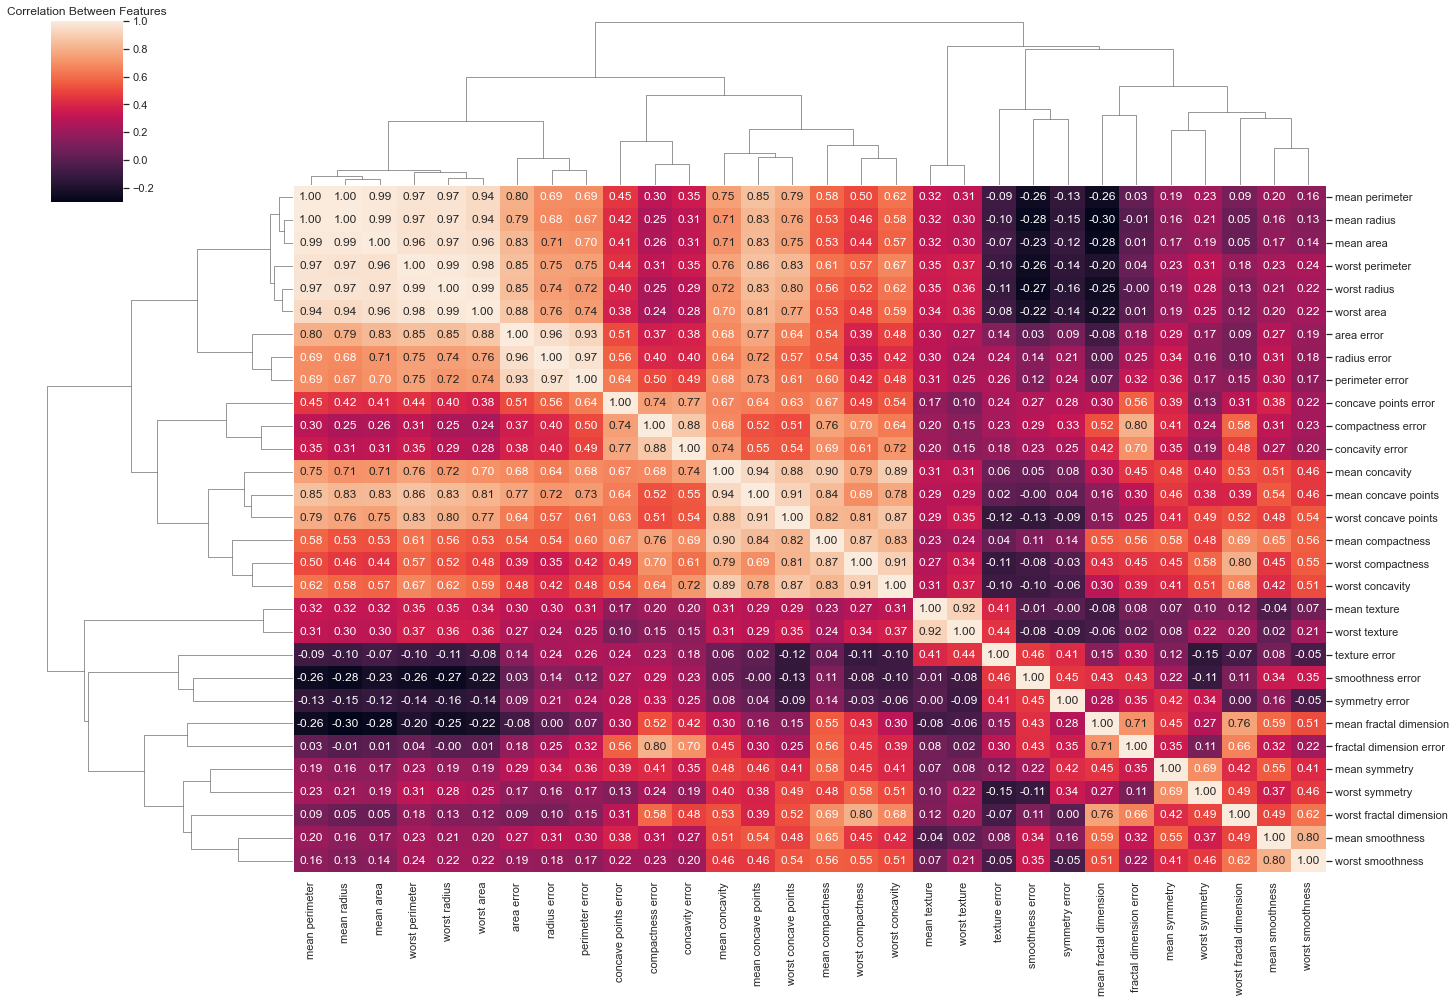

In [140]:
sns.set(font_scale=1.0)
# Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.
corr_matrix = df_X_clean.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,14)) # Plot the correlation matrix as a hierarchically-clustered heatmap.
plt.title("Correlation Between Features")
plt.show()

<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
 Radius, area and perimeter (mean, the worst, and the standard error ) have strong positive correlation. 
</div>

[seaborn.jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) : plotting a bivariate relationship and distributions.

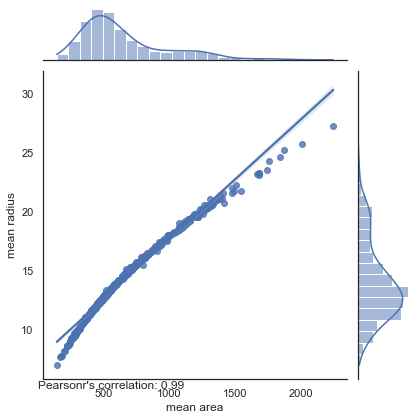

In [141]:
import scipy.stats as stats #  library of statistical functions (we'll use to compute pearson correlation)

# Plot correlation between 2 features and distribution
sns.set(style="white")

# seaborn.jointplot draws a plot of two variables with bivariate and univariate graphs
# ax = sns.jointplot(df_X_clean.loc[:,'mean area'], 
#               df_X_clean.loc[:,'mean radius'], 
#               kind="reg" )
ax = sns.jointplot(data=df_X_clean,
                   x='mean area',
                   y='mean radius',
                      kind="reg")

ax.ax_joint.text(-3,5, f"Pearsonr's correlation: {stats.pearsonr(df_X_clean.loc[:,'mean area'], df_X_clean.loc[:,'mean radius'])[0]:.2f}")

# sns.jointplot(df_X_clean.loc[:,'mean radius'], 
#               df_X_clean.loc[:,'mean area'], 
#               kind="reg")
# sns.jointplot(df_X_clean.loc[:,'mean area'], 
#               df_X_clean.loc[:,'mean perimeter'], 
#               kind="reg")
plt.show()

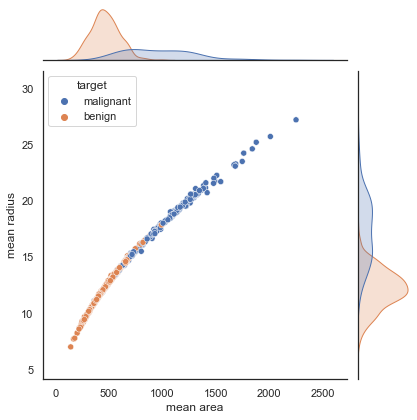

In [142]:
ax = sns.jointplot(data=df_X_clean.merge(df_y,left_index=True, right_index=True),
                   x='mean area',
                   y='mean radius',
                      hue="target")


### Removing multi-colinearity
<div class="alert alert-block alert-warning" style='color:black'>
If two variables are highly correlated, 
- They probably carry similar _information_. 
- E.g., perimeter, radius, area

This is a problem because information is somehow over-represented

This is named multi-colinearity, i.e., the columns depend on each other
- This is an issue that must be addressed.
</div>

From the analysis we did so far, we know that we can:
- drop _worst radius_,_worst area_,_worst perimeter_, _mean perimeter_, _mean radius_ columns (they have a strong correlation with  _mean area_) and leave only _mean area_.
- drpo _area error_, _perimeter error_ and  leave only _area error_.


In [143]:
# drop multicolinearity variables
df_X_clean = df_X_clean.drop(['worst radius','worst area','worst perimeter','perimeter error', 'radius error', 'mean perimeter', 'mean radius'],axis=1)
df_X_clean.columns

Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [144]:
df_X_clean

mean texture  mean area  mean smoothness  mean compactness  \
0           10.38     1001.0          0.11840           0.27760   
1           17.77     1326.0          0.08474           0.07864   
2           21.25     1203.0          0.10960           0.15990   
4           14.34     1297.0          0.10030           0.13280   
5           15.70      477.1          0.12780           0.17000   
..            ...        ...              ...               ...   
564         22.39     1479.0          0.11100           0.11590   
565         28.25     1261.0          0.09780           0.10340   
566         28.08      858.1          0.08455           0.10230   
567         29.33     1265.0          0.11780           0.27700   
568         24.54      181.0          0.05263           0.04362   

     mean concavity  mean concave points  mean symmetry  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.1812   
2           0.19740              0.12790         0.2069   
4           0.19800              0.10430         0.1809   
5           0.15780              0.08089         0.2087   
..              ...                  ...            ...   
564         0.24390              0.13890         0.1726   
565         0.14400              0.09791         0.1752   
566         0.09251              0.05302         0.1590   
567         0.35140              0.15200         0.2397   
568         0.00000              0.00000         0.1587   

     mean fractal dimension  texture error  area error  ...  \
0                   0.07871         0.9053      153.40  ...   
1                   0.05667         0.7339       74.08  ...   
2                   0.05999         0.7869       94.03  ...   
4                   0.05883         0.7813       94.44  ...   
5                   0.07613         0.8902       27.19  ...   
..                      ...            ...         ...  ...   
564                 0.05623         1.2560      158.70  ...   
565                 0.05533         2.4630       99.04  ...   
566                 0.05648         1.0750       48.55  ...   
567                 0.07016         1.5950       86.22  ...   
568                 0.05884         1.4280       19.15  ...   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
4                 0.01885         0.01756                 0.005115   
5                 0.01137         0.02165                 0.005082   
..                    ...             ...                      ...   
564               0.02454         0.01114                 0.004239   
565               0.01678         0.01898                 0.002498   
566               0.01557         0.01318                 0.003892   
567               0.01664         0.02324                 0.006185   
568               0.00000         0.02676                 0.002783   

     worst texture  worst smoothness  worst compactness  worst concavity  \
0            17.33           0.16220            0.66560           0.7119   
1            23.41           0.12380            0.18660           0.2416   
2            25.53           0.14440            0.42450           0.4504   
4            16.67           0.13740            0.20500           0.4000   
5            23.75           0.17910            0.52490           0.5355   
..             ...               ...                ...              ...   
564          26.40           0.14100            0.21130           0.4107   
565          38.25           0.11660            0.19220           0.3215   
566          34.12           0.11390            0.30940           0.3403   
567          39.42           0.16500            0.86810           0.9387   
568          30.37           0.08996            0.06444  

# Store our pre-processed data in a CSV file

In this analysis we have
- dropped 12 extreme outliers
- dropped all `radius` and `perimemter` columns as the are highly correlated with the corresponding `area` ones

In [145]:
## saving the preprocessed data on CSV file
#df_X_y_clean = df_X_clean.join(df_y)
df_X_y_clean =df_X_clean.merge(df_y,left_index=True, right_index=True,how='left')
df_X_y_clean

mean texture  mean area  mean smoothness  mean compactness  \
0           10.38     1001.0          0.11840           0.27760   
1           17.77     1326.0          0.08474           0.07864   
2           21.25     1203.0          0.10960           0.15990   
4           14.34     1297.0          0.10030           0.13280   
5           15.70      477.1          0.12780           0.17000   
..            ...        ...              ...               ...   
564         22.39     1479.0          0.11100           0.11590   
565         28.25     1261.0          0.09780           0.10340   
566         28.08      858.1          0.08455           0.10230   
567         29.33     1265.0          0.11780           0.27700   
568         24.54      181.0          0.05263           0.04362   

     mean concavity  mean concave points  mean symmetry  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.1812   
2           0.19740              0.12790         0.2069   
4           0.19800              0.10430         0.1809   
5           0.15780              0.08089         0.2087   
..              ...                  ...            ...   
564         0.24390              0.13890         0.1726   
565         0.14400              0.09791         0.1752   
566         0.09251              0.05302         0.1590   
567         0.35140              0.15200         0.2397   
568         0.00000              0.00000         0.1587   

     mean fractal dimension  texture error  area error  ...  symmetry error  \
0                   0.07871         0.9053      153.40  ...         0.03003   
1                   0.05667         0.7339       74.08  ...         0.01389   
2                   0.05999         0.7869       94.03  ...         0.02250   
4                   0.05883         0.7813       94.44  ...         0.01756   
5                   0.07613         0.8902       27.19  ...         0.02165   
..                      ...            ...         ...  ...             ...   
564                 0.05623         1.2560      158.70  ...         0.01114   
565                 0.05533         2.4630       99.04  ...         0.01898   
566                 0.05648         1.0750       48.55  ...         0.01318   
567                 0.07016         1.5950       86.22  ...         0.02324   
568                 0.05884         1.4280       19.15  ...         0.02676   

     fractal dimension error  worst texture  worst smoothness  \
0                   0.006193          17.33           0.16220   
1                   0.003532          23.41           0.12380   
2                   0.004571          25.53           0.14440   
4                   0.005115          16.67           0.13740   
5                   0.005082          23.75           0.17910   
..                       ...            ...               ...   
564                 0.004239          26.40           0.14100   
565                 0.002498          38.25           0.11660   
566                 0.003892          34.12           0.11390   
567                 0.006185          39.42           0.16500   
568                 0.002783          30.37           0.08996   

     worst compactness  worst concavity  worst concave points  worst symmetry  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
4              0.20500           0.4000                0.1625          0.2364   
5              0.52490           0.5355                0.1741          0.3985   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940          

In [146]:
df_X_y_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean texture             557 non-null    float64
 1   mean area                557 non-null    float64
 2   mean smoothness          557 non-null    float64
 3   mean compactness         557 non-null    float64
 4   mean concavity           557 non-null    float64
 5   mean concave points      557 non-null    float64
 6   mean symmetry            557 non-null    float64
 7   mean fractal dimension   557 non-null    float64
 8   texture error            557 non-null    float64
 9   area error               557 non-null    float64
 10  smoothness error         557 non-null    float64
 11  compactness error        557 non-null    float64
 12  concavity error          557 non-null    float64
 13  concave points error     557 non-null    float64
 14  symmetry error           5

We reset indexes because we have 'holes'
- 557 entries
- index up 568

In [147]:
df_X_y_clean.reset_index(inplace=True,drop=True)
df_X_y_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean texture             557 non-null    float64
 1   mean area                557 non-null    float64
 2   mean smoothness          557 non-null    float64
 3   mean compactness         557 non-null    float64
 4   mean concavity           557 non-null    float64
 5   mean concave points      557 non-null    float64
 6   mean symmetry            557 non-null    float64
 7   mean fractal dimension   557 non-null    float64
 8   texture error            557 non-null    float64
 9   area error               557 non-null    float64
 10  smoothness error         557 non-null    float64
 11  compactness error        557 non-null    float64
 12  concavity error          557 non-null    float64
 13  concave points error     557 non-null    float64
 14  symmetry error           5

In [148]:
df_X_y_clean.to_csv("data/WBCD_preprocessed.csv",index=False)  # create the 'data' folder before saving

Correlation ‘among the predictors’ is a problem to be rectified to be able to come up with a reliable model.
- Another measure that is commonly used to help diagnose multi-colinearity is presented in the [APPENDIX](#APPENDIX).

# APPENDIX

This appendix includes further information on the course topics but **will not be part of the exam topics**.

## Missing values

In [38]:
df = pd.DataFrame([[3, 2 ],[3, np.nan],[4,4]], columns=list('AB'))
df

A    B
0  3  2.0
1  3  NaN
2  4  4.0

### Drop

The *dropna()* function is used to remove missing values. Determine if rows or columns which contain missing values are removed. 

In [39]:
print(f'Boolean mask\n{df.isnull()} \nDrop missing values')
df.dropna()


Boolean mask
       A      B
0  False  False
1  False   True
2  False  False 
Drop missing values


A    B
0  3  2.0
2  4  4.0

Drop columns with too many missing values 

In [40]:
df_null = pd.DataFrame([[3, 2 ],[3, np.nan],[4,np.nan]], columns=list('AB'))
df_null

A    B
0  3  2.0
1  3  NaN
2  4  NaN

In [41]:
# df_null.dropna(axis=1)
# Drop columns using that limit
limit = len(df_null) * 0.7 # How many non-NA values in each column/row? 2
df_null.dropna(axis=1, thresh=limit) # columns having null values more than or equal to 70 percent are dropped from the dataframe

A
0  3
1  3
2  4

### Fill with summarizing statistics

In the following example, the missing values in the 'B' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [42]:
df

A    B
0  3  2.0
1  3  NaN
2  4  4.0

In [43]:
df['B'] =  df.B.fillna(df.B.median()) # median() exclude NA/null values when computing the result by default
print(f"Replace missing value in 'B' column by the median value \n{df}")


Replace missing value in 'B' column by the median value 
   A    B
0  3  2.0
1  3  3.0
2  4  4.0


<div class="alert alert-block alert-info" style='color:black'>
<b>Tip fillna</b>      

We can replace NA with:
- If column contains numerical data:
  * The mean  of the numerical column data is used to replace null values when the data is normally distributed
  * Median is used if the data comprised of outliers.
- Not necessarilty numerical data
  * Mode is used when the data having more occurences of a particular value or more frequent value.

Or, we use more advanced techniques to _impute_ values...
</div>

In [ ]:
# df_city= pd.DataFrame({'city':["paris", "paris", "", "milan"]})
# df_city = df_city.replace({"": np.nan}) 
# df_city.info()
# most_freq_city = df_city['city'].mode().iloc[0]
# most_freq_city
# df_city.city.fillna(most_freq_city) 

> Taking into account the whole column (all rows) to fill missing values might be too inaccurate
> - Filling age of titanic passenders with mean/meadin of all passenger is inaccurate and not useful
> 
> You should 
> - either be creative finding ways to divide passengers in reasonable subgroups
> - or use more sophisticated techniques to impute the missing values! We do this in next section

### More sophisticated algorithms to fill/impute missing values: KNNImputer
[KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) 
- In the coming classes we will discuss the notion of classification algorithms.
- A famous one is the _k-nearest neighbors_ algorithm which, informally, given a new point _p_
   - computes the set of k neighbors closest to _p_ among those with a label
   - predicts the value of the label of _p_ based on the labels of the neighbors
     - Discrete label (classification): takes the majority label
     - Continuous label (regression): takes the mean among the labels

- Classification algorithms (or regression) such as the _k-nearest neighbors_ can be used for imputing missing data by 
  - finding the k closest neighbors to the observation with missing data and 
  - imputing them based on the the non-missing values in the neighbors.
  
The rational is
- A point will tend to be _similar_ to its neighbors

Each missing value is imputed using the majority/mean value from the nearest neighbors from the _training set_.
- We discuss the notion of training set in next class
- Intuitively, it is a portion of the data for which we have labels used to train our AI model.

> Two samples are close if the features that neither is missing are close.

In [44]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2  , np.nan],   #point/row 1
     [3, 4  , 3     ],   #point/row 2
     [8, 8  , 7     ],   #point/row 3
     [2, 6  , 5     ],   #point/row 4
    ]


In [45]:
imputer = KNNImputer(n_neighbors=1)
#The 1 point closest to [1,2] is row 2 [3,4]. 
# Row 2 contains 3, therefore I take it
imputer.fit_transform(X)

array([[1., 2., 3.],
       [3., 4., 3.],
       [8., 8., 7.],
       [2., 6., 5.]])

In [46]:
imputer = KNNImputer(n_neighbors=2)
#The 2 point closest to [1,2] are row 2 [3,4], and row 4[2,6]
# Row 2 contains 3, row 4 contains 5. I take 4
imputer.fit_transform(X)

array([[1., 2., 4.],
       [3., 4., 3.],
       [8., 8., 7.],
       [2., 6., 5.]])

## Data Preprocessing

### Convert Skewed data to Normal Distribution
When it comes to skewed distributions, the most common
response is to transform the data

Generally, the most common type of skewness is
right-skewness

Consequently, the most common type of transformation is the
log transform

In [ ]:
from scipy.stats import skewnorm
df_skewed = pd.DataFrame({'car_crash': skewnorm.rvs(10, size=100)+1}) # positive skewed data
sns.distplot(df_skewed)

In [ ]:

fig, ax = plt.subplots()
## log  transformation: can't be applied to zero or negative values
sns.distplot(np.log(df_skewed))
##square root transformation
sns.distplot(np.sqrt(df_skewed))


### MinMaxScaler
If your feature does not have a normal distribution, you can use MinMaxScaler(). 
- It will transform each value in the column proportionally within the range [0,1]. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df_X)
minmax_df = pd.DataFrame(minmax_df, columns =df_X.columns)

minmax_df.head(2)

## Exploratory data analysis 

### Interactive graphs
The [plotly](https://plotly.com/python/) Python library is an interactive, open-source plotting library that supports over 40 unique chart types.

Built on top of the Plotly JavaScript library (plotly.js), 
- plotly enables Python users to create beautiful interactive web-based visualizations that can be 
  - displayed in Jupyter notebooks, 
  - saved to standalone HTML files, 
  - or served as part of pure Python-built web applications using Dash.

In [ ]:
# plotly for  web-based visualizations
%pip install plotly

In [ ]:
#Plotly Express is the easy-to-use, high-level interface to Plotly (https://plotly.com/python/plotly-express/)
import plotly.express as px
from IPython.display import HTML


fig = px.histogram(df_y, x='target', color="target", 
                   color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                    "malignant": "tomato", "benign": "limegreen"}
            )
HTML(fig.to_html())

Yet another scatter_matrix
- but this is an interactive one!

In [ ]:
df = pd.concat([df_X_mean,df_y], axis=1)

fig = px.scatter_matrix(df, color='target',height=1000, title='Scatter Matrix'
                       , color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

fig.update_layout(
    font_size=9, # set fontsize = 9
    plot_bgcolor= 'white',# set background color = white
)


HTML(fig.to_html())

In [ ]:

#violin plot
fig = px.violin(data_for_violinplot,x="features", y="value",  color="target", box=True,
                title='Violin Matrix',
                color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

HTML(fig.to_html())

In [ ]:
fig = px.box(data_for_violinplot,x="features", y="value",  color="target", 
             color_discrete_map={ # replaces default color mapping by value (ref https://i.stack.imgur.com/lFZum.png)
                "malignant": "tomato", "benign": "limegreen"
            })

HTML(fig.to_html())

In [ ]:
fig = px.imshow(df_X_mean.corr(), width=800, color_continuous_scale='RdBu_r')
HTML(fig.to_html())

In [ ]:
# saving into html page
with open('interactive_chart.html', 'w') as f:
    f.write(fig.to_html())

https://www.python-graph-gallery.com/

### Exploring dataset: Decision Tree
Although still under data exploration, we can get useful information by training a Decision Tree from all characteristics. 
- We will explain the Decision Tree model better in the second part of this lesson.
- It is an AI model that is explainable!
  - That is, we can easily explain its decisions!

In [ ]:
from sklearn import tree
X = df_X.values
y = df_y.values 

clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)  
clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, 
                   feature_names=df_X.columns,  
                   class_names=['Malignant','Benign'],
                   filled=True)
for o in out: 
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

## Outliers Detection

1. [Leys C, Delacre M, Mora YL, Lakens D, Ley C. How to Classify, Detect, and Manage Univariate and Multivariate Outliers, With Emphasis on Pre-Registration. International Review of Social Psychology. 2019;32(1):5. DOI: http://doi.org/10.5334/irsp.289](https://www.rips-irsp.com/articles/10.5334/irsp.289). 
2. [Rousseeuw, P.J. and Hubert, M. (2018), Anomaly detection by robust statistics. WIREs Data Mining Knowl Discov, 8: e1236.](https://doi.org/10.1002/widm.1236)

They suggest the use of the median absolute deviation (MAD) to detect univariate outliers. 
Again, the idea is conceptually similar to computed z-scores: for each value, subtract the median from it, and divide by the median of the absolute deviations.

In [ ]:
def mad(x):
    return 1.483 * np.median(np.abs(x- np.median(x)))

df_X_clean_mad = df_X[df_X.apply(lambda x: (x - np.median(x))/mad(x) <= 3.0).all(axis=1)]
print("How many outliers?",len(df_X)-len(df_X_clean_mad))


### Multivariate
[Sklearn includes different advanced outlier detection methods based on machine learning (ML)](https://scikit-learn.org/stable/modules/outlier_detection.html) 
- It can handle correlated multivariate dataset, detect abnormalities within them, and do not assume a normal distributions of the features.

#### LocalOutlierFactor
LocalOutlierFactor (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. 
It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = df_X.values

# The LOF score of an observation is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density:
# a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(X)
# The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.
lof = clf.negative_outlier_factor_ 

# we obtained the threshold value from the scores by using the quantile function.
# Here, we got the lowest 2 percent of score values as the anomalies.
thresh = np.quantile(lof, .02)

# We extracted the anomalies by comparing the threshold value and identify the values of elements.
index = np.where(lof<=thresh)
values = X[index]
len(values)


## Correlation: VIF 


Another measure that is commonly used to help diagnose multicollinearity is the **variance inflation factor (VIF)**.
Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. **VIF is preferred as it can show the correlation of a variable with a group of other variables.**


VIF measures how much of the variation in one variable is explained by the other variable. This is done by running a regression using one of the correlated x variables as the dependent variable against the other variables as predictor variables.
![](images/vip.png)

Use the following guidelines to interpret the VIF:

|VIF| Status of predictors|
|------|------|
|VIF = 1|Not correlated|
|1 < VIF < 5|Moderately correlated|
|VIF > 5|Highly correlated|



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_X_scaled.columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_X_scaled.values, i) 
                          for i in range(len(df_X_scaled.columns))] 
  
print(vif_data.sort_values(by='VIF', ascending=False ))

 _mean radius_ is  highly correled to the other variable. **Dropping variables should be an iterative process starting with the variable having the largest VIF.**
 
